# Top 5 Tech Cities worth Investing

**Authors**: Alice Agrawal, Jordan Kominsky, Kyongmin So, Tyler Wood, Hanis Zulmuthi

***May 2022***

## Overview

Real estate has always been one of the most dependable markets when looking for consistent, yet high returns. Even after the housing crash of 2008, it only took a few years for the market to return to previous highs, and it has maintained steady growth ever since. This has been especially true in markets with high incomes and high density such as San Francisco or New York. Tech jobs are also gaining prominence in the job market and acquiring real estate that could serve these migrating employees could give us a competitive edge.

## Business Understanding

Tech is becoming a larger part of both the US and the Global economy every year. As tech grows in a city, it doesn't only bring tech jobs, it also brings other facets of culture. In the main tech hubs of America, you'll find much more than just the industrious culture of modern technology; there will be growth in art exhibits, breweries, parks, and many other places where people can share experiences. These traits make tech cities desirable places of residence not only for those in technology, but also anyone who values being in a place that is culturally engaging. 

As time goes on, less people are deciding to stay in their small towns and are moving to larger cities instead. We can see a chart from business insider that portrays the shrinking of rural America [here](https://www.businessinsider.com/us-census-map-widespread-population-declines-in-rural-areas-2021-8). Furthermore, when we look at the growth of cities, we find that the largest cities are growing at the fastest rate. This article from the [Brookings Institute](https://www.brookings.edu/blog/the-avenue/2017/10/17/big-cities-small-cities-and-the-gaps/) mentions this phenomenon. 

A large proportion of this growth will most likely be seen in these emerging tech hubs due to their wide cultural and employment appeal. We selected 10 cities to analyze in America that we think hold promise as places of high growth. We decided on these 10  due to an [Indeed article](https://www.indeed.com/career-advice/finding-a-job/top-cities-for-tech-jobs-2020) that asserted these cities as places of high prominence in the tech industry. Specifically, these cities were Washington D.C., New York City, Seattle, San Francisco, Los Angeles, San Jose, Dallas, Boston, Chicago, and Baltimore. Many of these places have expensive markets already, but there is no shortage of demand for housing in any of these cities. As the tech sector continues to grow, there will be an even greater need to develop housing. The political landscape is starting to warm up to higher density developments such as multiplexes, which will allow for new housing development opportunities in these markets that have previously been unprofitable. Focusing on these high growth areas will provide us an advantage over the competition that is more cautious to invest in these markets with higher upfront investment barriers.

## Data Understanding

### Home Price
**Source**: [Zillow Dataset](https://www.zillow.com/research/data/)

**Contents**: We acquired data for 14,723 different zip codes in America. The data provided monthly data on the median home price for every zip code from April 1996 to April 2018. We selected the data from the 10 prominent tech cities specified earlier, and ran a time series analysis on all of them. 

### 2017 Median Income
**Source**: [Kaggle Dataset](https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations?select=Income_Methodology.pdf)

**Contents**: We also found data on the median income for our 10 cities. We used this to look at the home price to income ratio for our 10 cities and compare it to the [U.S. average of 5.75](https://www.longtermtrends.net/home-price-median-annual-income-ratio/). 

# Data Cleaning & Preparation

## Import packages

In [2]:
# Basics
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
from datetime import datetime as dt

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.patches as mpatches

# Modeling
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error 

# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

## Home Price

In [3]:
# load in zillow home price data as df
df = pd.read_csv('Data/zillow_data.csv')
df

RegionID  RegionName                 City State              Metro  \
0         84654       60657              Chicago    IL            Chicago   
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO                NaN   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0           Cook         1  334200.0  335400.0  336500.0  ...  1005500   
1         Collin         2  235700.0  236900.0  236700.0  ...   308000   
2         Harris         3  210400.0  212200.0  212200.0  ...   321000   
3           Cook         4  498100.0  500900.0  503100.0  ...  1289800   
4        El Paso         5   77300.0   77300.0   77300.0  ...   119100   
...          ...       ...       ...       ...       ...  ...      ...   
14718   Franklin     14719   94600.0   94300.0   94000.0  ...   216800   
14719    Grafton     14720   92700.0   92500.0   92400.0  ...   202100   
14720    Madison     14721   57100.0   57300.0   57500.0  ...   121800   
14721   Gunnison     14722  191100.0  192400.0  193700.0  ...   662800   
14722      Clark     14723  176400.0  176300.0  176100.0  ...   333800   

       2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
0      1007500  1007800  1009600  1013300  1018700  1024400  1030700  1033800   
1       310000   312500   314100   315000   316600   318100   319600   321100   
2       320600   320200   320400   320800   321200   321200   323000   326900   
3      1287700  1287400  1291500  1296600  1299000  1302700  1306400  1308500   
4       119400   120000   120300   120300   120300   120300   120500   121000   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14718   217700   218600   218500   218100   216400   213100   209800   209200   
14719   208400   212200   215200   214300   213100   213700   218300   222700   
14720   122800   124600   126700   128800   130600   131700   132500   133000   
14721   671200   682400   695600   695500   694700   706400   705300   681500   
14722   336400   339700   343800   346800   348900   350400   353000   356000   

       2018-04  
0      1030600  
1       321800  
2       329900  
3      1307000  
4       121500  
...        ...  
14718   209300  
14719   225800  
14720   133400  
14721   664400  
14722   357200  

[14723 rows x 272 columns]

In [4]:
# we have some nulls for some of the zip codes for earlier dates, and some missing metro areas
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 272 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    14723 non-null  int64  
 1   RegionName  14723 non-null  int64  
 2   City        14723 non-null  object 
 3   State       14723 non-null  object 
 4   Metro       13680 non-null  object 
 5   CountyName  14723 non-null  object 
 6   SizeRank    14723 non-null  int64  
 7   1996-04     13684 non-null  float64
 8   1996-05     13684 non-null  float64
 9   1996-06     13684 non-null  float64
 10  1996-07     13684 non-null  float64
 11  1996-08     13684 non-null  float64
 12  1996-09     13684 non-null  float64
 13  1996-10     13684 non-null  float64
 14  1996-11     13684 non-null  float64
 15  1996-12     13684 non-null  float64
 16  1997-01     13684 non-null  float64
 17  1997-02     13684 non-null  float64
 18  1997-03     13684 non-null  float64
 19  1997-04     13684 non-nu

In [5]:
# The min of the zipcodes is only 4 digits, this is because some zips start with 0
df.describe()

RegionID    RegionName      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
max    753844.000000  99901.000000  14723.000000  3.676700e+06  3.704200e+06   

            1996-06       1996-07       1996-08       1996-09       1996-10  \
count  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04   
mean   1.185374e+05  1.186531e+05  1.187803e+05  1.189275e+05  1.191205e+05   
std    8.630923e+04  8.646795e+04  8.665094e+04  8.687208e+04  8.715185e+04   
min    1.160000e+04  1.180000e+04  1.180000e+04  1.200000e+04  1.210000e+04   
25%    6.910000e+04  6.920000e+04  6.937500e+04  6.950000e+04  6.960000e+04   
50%    9.970000e+04  9.970000e+04  9.980000e+04  9.990000e+04  9.995000e+04   
75%    1.432250e+05  1.432250e+05  1.435000e+05  1.437000e+05  1.439000e+05   
max    3.729600e+06  3.754600e+06  3.781800e+06  3.813500e+06  3.849600e+06   

       ...       2017-07       2017-08       2017-09       2017-10  \
count  ...  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04   
mean   ...  2.733354e+05  2.748658e+05  2.764646e+05  2.780332e+05   
std    ...  3.603984e+05  3.614678e+05  3.627563e+05  3.644610e+05   
min    ...  1.440000e+04  1.450000e+04  1.470000e+04  1.480000e+04   
25%    ...  1.269000e+05  1.275000e+05  1.282000e+05  1.287000e+05   
50%    ...  1.884000e+05  1.896000e+05  1.905000e+05  1.914000e+05   
75%    ...  3.050000e+05  3.066500e+05  3.085000e+05  3.098000e+05   
max    ...  1.888990e+07  1.870350e+07  1.860530e+07  1.856940e+07   

            2017-11       2017-12       2018-01       2018-02       2018-03  \
count  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04   
mean   2.795209e+05  2.810953e+05  2.826571e+05  2.843687e+05  2.865114e+05   
std    3.656003e+05  3.670454e+05  3.695727e+05  3.717739e+05  3.724612e+05   
min    1.450000e+04  1.430000e+04  1.410000e+04  1.390000e+04  1.380000e+04   
25%    1.292500e+05  1.299000e+05  1.306000e+05  1.310500e+05  1.319500e+05   
50%    1.925000e+05  1.934000e+05  1.941000e+05  1.950000e+05  1.967000e+05   
75%    3.117000e+05  3.134000e+05  3.151000e+05  3.168500e+05  3.188500e+05   
max    1.842880e+07  1.830710e+07  1.836590e+07  1.853040e+07  1.833770e+07   

            2018-04  
count  1.472300e+04  
mean   2.880399e+05  
std    3.720544e+05  
min    1.380000e+04  
25%    1.324000e+05  
50%    1.981000e+05  
75%    3.211000e+05  
max    1.789490e+07  

[8 rows x 268 columns]

In [6]:
# for example, Agawam Massachusetts zip code is 01001
df[df['RegionName'] == 1001]

RegionID  RegionName    City State        Metro CountyName  SizeRank  \
5850     58196        1001  Agawam    MA  Springfield    Hampden      5851   

       1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  \
5850  113100.0  112800.0  112600.0  ...   213900   215700   218200   220100   

      2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
5850   221100   221700   221700   221700   222700   223600  

[1 rows x 272 columns]

Many cities may share names with cities in other states. For example, there are 13 different cities named Washington in America. In order to quickly select only the cities that we want, we created a column that includes both the city and the state as a string.

In [7]:
# list of all the different states with a city named Washington
df[df['City'] == 'Washington']['State'].unique()

array(['DC', 'PA', 'NJ', 'IL', 'MO', 'UT', 'MI', 'IN', 'IA', 'WV', 'NY',
       'CT', 'NH'], dtype=object)

In [8]:
# combines the City and State columns as a new Geolocate columns
df['Geolocate'] = df['City'] + ', ' + df['State']

### Mask data to cities of interest

We're interested in looking at the housing market of major [tech cities](https://www.indeed.com/career-advice/finding-a-job/top-cities-for-tech-jobs-2020) in the US. We know that these markets are prominent in the technology sector, and limiting our model to only these large cities will allow us to create a better model th at fits large city real estate dynamics. 

In [9]:
# list of the 10 tech cities
city_list = ['Washington, DC','New York, NY','San Francisco, CA','Seattle, WA',\
             'Dallas, TX','Los Angeles, CA','San Jose, CA','Chicago, IL','Baltimore, MD','Boston, MA']

In [10]:
# create a df that only contains our 10
df_cities = df[df.Geolocate.isin(city_list)]
df_cities.head()

RegionID  RegionName           City State          Metro     CountyName  \
0     84654       60657        Chicago    IL        Chicago           Cook   
3     84616       60614        Chicago    IL        Chicago           Cook   
6     61807       10467       New York    NY       New York          Bronx   
7     84640       60640        Chicago    IL        Chicago           Cook   
9     97564       94109  San Francisco    CA  San Francisco  San Francisco   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-08  2017-09  2017-10  \
0         1  334200.0  335400.0  336500.0  ...  1007500  1007800  1009600   
3         4  498100.0  500900.0  503100.0  ...  1287700  1287400  1291500   
6         7  152900.0  152700.0  152600.0  ...   400000   407300   411600   
7         8  216500.0  216700.0  216900.0  ...   787100   776100   774900   
9        10  766000.0  771100.0  776500.0  ...  3763900  3775000  3799700   

   2017-11  2017-12  2018-01  2018-02  2018-03  2018-04          Geolocate  
0  1013300  1018700  1024400  1030700  1033800  1030600        Chicago, IL  
3  1296600  1299000  1302700  1306400  1308500  1307000        Chicago, IL  
6   413200   414300   413900   411400   413200   417900       New York, NY  
7   777900   777900   778500   780500   782800   782800        Chicago, IL  
9  3793900  3778700  3770800  3763100  3779800  3813500  San Francisco, CA  

[5 rows x 273 columns]

## 2017 Median Income data

Here we thought it would be productive to look at the median income at these major tech cities. This 2017 median income data was found on [Kaggle](https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations?select=Income_Methodology.pdf) in the form of a csv. Cities with higher median incomes would be much more likely to invest in properties. However, if a cities home price to income ratio gets too high, it can end up making people more likely to lease apartments rather than buy long-term housing. 

In [11]:
#Load income data
df_income = pd.read_csv('Data/kaggle_income.csv',
                       encoding = 'ISO-8859-1')

#Combine city and state
df_income['Geolocate'] = df_income['City'] + ', ' + df_income['State_ab']

#Mask dataframe to cities of interest
df_income = df_income[df_income.Geolocate.isin(city_list)]

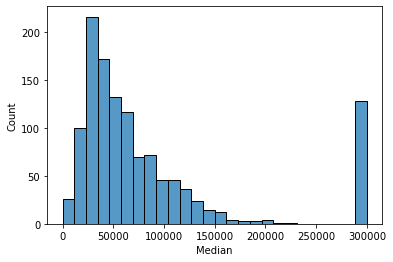

In [12]:
#Look at distribution of 2017 median income 
sns.histplot(df_income['Median']);

In [13]:
# summary statistics of the income df, some median incomes are 0 or 300,000
df_income.describe()

id   State_Code      Zip_Code         ALand        AWater  \
count  1.227000e+03  1227.000000   1227.000000  1.227000e+03  1.227000e+03   
mean   6.428769e+07    21.402608  60256.520782  1.881765e+06  3.313473e+05   
std    1.032249e+08    15.223327  31795.355730  1.750294e+07  6.917771e+06   
min    1.101200e+04     6.000000   2111.000000  0.000000e+00  0.000000e+00   
25%    1.702394e+07     6.000000  21221.000000  3.307440e+05  0.000000e+00   
50%    2.402528e+07    17.000000  60647.000000  6.745220e+05  0.000000e+00   
75%    6.021341e+07    36.000000  90034.000000  1.337892e+06  0.000000e+00   
max    4.802131e+08    53.000000  98199.000000  5.888084e+08  2.396078e+08   

               Lat          Lon           Mean         Median          Stdev  \
count  1227.000000  1227.000000    1227.000000    1227.000000    1227.000000   
mean     38.731672   -96.637755   74328.420538   83886.340668   53879.555012   
std       3.876569    18.901290   38142.665762   81792.355697   20528.416491   
min      29.659982  -122.510436       0.000000       0.000000       0.000000   
25%      34.088205  -118.304154   43791.500000   32824.000000   37546.500000   
50%      39.302056   -87.733943   65069.000000   54857.000000   53365.000000   
75%      41.781700   -76.955035   98983.500000   95948.000000   71082.500000   
max      47.730188   -71.054128  206380.000000  300000.000000  103836.000000   

               sum_w  
count    1227.000000  
mean     1051.350246  
std     17852.654704  
min         0.000000  
25%       194.785034  
50%       314.086381  
75%       566.773104  
max    612241.922964

The distribution of the median income in the major tech cities is skewed to right. There is a little cleaning that needs to be done for this data, which could lead to a little inconsistency with actual real world figures. Interesting that the median of the 2017 median income is ~$50,000. Looking at the distribution above and the data frame below, it seems that income is higher than average in these cities, but the wealth is concentrated in specific neighborhoods. This could provide opportunities for investment in neighborhoods that could be raised in value. However, this should be done in a way that does not disrupt affordable housing and lead to gentrification. 

In [14]:
# This will remove the zip codes equal to 0 or 300,000
df_income = df_income[df_income['Median'] != 0][df_income['Median'] != 300000]

<ipython-input-14-bbacd809ea29>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_income = df_income[df_income['Median'] != 0][df_income['Median'] != 300000]


In [15]:
# look at the median of median income
df_income['Median'].median()

49318.5

In [16]:
# Group by cities and aggregate the values
df_income = df_income.groupby(['Geolocate']).agg({'Mean': 'mean',
                                                  'Median': 'mean',
                                                  'Stdev': 'mean'}).reset_index()
df_income[['Mean', 'Median', 'Stdev']] = df_income[['Mean', 'Median', 'Stdev']].astype('int')

# Rename columns
df_income = df_income.rename(columns = {'Mean':'Mean_2017income','Median':'Median_2017income','Stdev':'Stdev_2017income'})
df_income

Geolocate  Mean_2017income  Median_2017income  Stdev_2017income
0      Baltimore, MD            62451              53203             45935
1         Boston, MA            79133              59771             67582
2        Chicago, IL            63156              50451             49568
3         Dallas, TX            65304              55669             47353
4    Los Angeles, CA            57626              45759             46520
5       New York, NY            92179              80079             66525
6  San Francisco, CA            98358              83966             72248
7       San Jose, CA            94888              84591             62358
8        Seattle, WA            82974              68733             59768
9     Washington, DC            85698              73142             62392

In [17]:
# Pull out 2017 home price
home_price_2017 = df_cities.groupby('Geolocate').median()
home_price_2017 = home_price_2017[['2017-12']]
home_price_2017 = home_price_2017.reset_index()
home_price_2017

Geolocate    2017-12
0      Baltimore, MD   160450.0
1         Boston, MA   551200.0
2        Chicago, IL   355200.0
3         Dallas, TX   326700.0
4    Los Angeles, CA   730500.0
5       New York, NY   727350.0
6  San Francisco, CA  1704500.0
7       San Jose, CA  1077100.0
8        Seattle, WA   827100.0
9     Washington, DC   771150.0

The median income in the US in 2017 was $61,000, so it's likely that this data is slightly off. Still, half of the cities have a median income well above average. The incomes are probably underestimated, so the home-price income ratios will probably be slightly inflated. Even after we qualify the observations from this graph, we can see several of the cities have housing prices over the us average ratio of 5.75 (in 2017). While these high ratios do show that many people will not be able to buy homes, they also show that there is high demand for more housing in many of these cities.

In [18]:
# Merge dataframes containing 2017 median income and 2017 median house price.

city_df = df_income.merge(home_price_2017)
city_df = city_df.rename(columns = {'2017-12':'Median_house_price_2017'})
city_df ['Home/income Ratio'] = city_df['Median_house_price_2017']/city_df['Median_2017income']
city_df

Geolocate  Mean_2017income  Median_2017income  Stdev_2017income  \
0      Baltimore, MD            62451              53203             45935   
1         Boston, MA            79133              59771             67582   
2        Chicago, IL            63156              50451             49568   
3         Dallas, TX            65304              55669             47353   
4    Los Angeles, CA            57626              45759             46520   
5       New York, NY            92179              80079             66525   
6  San Francisco, CA            98358              83966             72248   
7       San Jose, CA            94888              84591             62358   
8        Seattle, WA            82974              68733             59768   
9     Washington, DC            85698              73142             62392   

   Median_house_price_2017  Home/income Ratio  
0                 160450.0           3.015807  
1                 551200.0           9.221863  
2                 355200.0           7.040495  
3                 326700.0           5.868616  
4                 730500.0          15.964073  
5                 727350.0           9.082906  
6                1704500.0          20.299883  
7                1077100.0          12.733033  
8                 827100.0          12.033521  
9                 771150.0          10.543190

#### Plotting all our dataframe

In [19]:
fig = px.scatter(city_df, x = 'Median_house_price_2017',
                 y = 'Median_2017income',
                 text="Geolocate", color = 'Median_house_price_2017', size='Home/income Ratio',
                 size_max=25,
                 color_continuous_scale = 'Bluered', hover_name = 'Geolocate',
                 hover_data = {'Median_2017income': ':$,2f',
                               'Median_house_price_2017': ':$,2f'},
                labels={"Median_house_price_2017": "2017 Median Home price", "Median_2017income": "2017 Median Income"},
                width=1600, height=800)

fig.update_traces(textposition=["top center", "top right", "top right","top right",
                  "top right", "top right", "middle left", "top center", "top right", "middle right"])

fig.update_layout({"plot_bgcolor": "rgba(0, 0, 0, 0)",
                   "paper_bgcolor": "rgba(0, 0, 0, 0)"},
                  title_text = 'Median Household Income vs. Median Home Price ($USD) in the United States',
                  title_font_size = 18,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  showlegend = False,
                  hovermode = 'closest',
                  template = 'xgridoff')

## Time Series Data

### Prep time series data

In [20]:
# This function is provided with the starter notebook, changes df from wide to long format:
def melt_data(df,city):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','Geolocate'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    melted_df= melted.groupby('time').aggregate({'value':'median'})
    melted_df.rename(columns = {'value':city}, inplace = True)
    return melted_df

In [21]:
# instantiate melted_df as an empty dataframe
melted_df = pd.DataFrame()
# run a for loop over every city in our list
for city in city_list:
    # get all the observations from the cities we need
    city_df = df[df['Geolocate'] == city]
    # use the melt function to change the format for our df
    city_melt = melt_data(city_df,city)
    # replaces the empty dataframe with city_melt for the first iteration
    if len(melted_df) == 0:
        melted_df = city_melt
    # joins city_melt with the melted_df for every subsequent iteration
    else:
        melted_df=melted_df.join(city_melt)
melted_df

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-04-01        126500.0      175950.0           306900.0     170600.0   
1996-05-01        126250.0      175650.0           307600.0     171000.0   
1996-06-01        126000.0      175800.0           308400.0     171600.0   
1996-07-01        125800.0      175150.0           309300.0     172200.0   
1996-08-01        125750.0      174400.0           310500.0     173000.0   
1996-09-01        125900.0      174000.0           312000.0     173800.0   
1996-10-01        126250.0      174050.0           313700.0     174800.0   
1996-11-01        126650.0      173850.0           315600.0     176000.0   
1996-12-01        127300.0      174000.0           318100.0     177400.0   
1997-01-01        128050.0      174150.0           321000.0     179000.0   
1997-02-01        128800.0      174200.0           323900.0     180600.0   
1997-03-01        129500.0      174500.0           326600.0     182000.0   
1997-04-01        130200.0      174950.0           329600.0     183600.0   
1997-05-01        131050.0      175550.0           332600.0     185100.0   
1997-06-01        131900.0      176400.0           335800.0     186700.0   
1997-07-01        132650.0      177100.0           339200.0     188300.0   
1997-08-01        133350.0      177900.0           342700.0     190000.0   
1997-09-01        134000.0      178800.0           346400.0     192800.0   
1997-10-01        134800.0      179800.0           350400.0     196000.0   
1997-11-01        135700.0      181000.0           354500.0     199400.0   
1997-12-01        136650.0      181850.0           359100.0     203100.0   
1998-01-01        137600.0      182850.0           364200.0     206900.0   
1998-02-01        138500.0      183700.0           369300.0     210600.0   
1998-03-01        139150.0      184350.0           374100.0     214100.0   
1998-04-01        139950.0      185050.0           379100.0     217600.0   
1998-05-01        140750.0      185650.0           384000.0     221000.0   
1998-06-01        141700.0      186350.0           388900.0     224300.0   
1998-07-01        142650.0      187100.0           393700.0     227500.0   
1998-08-01        143650.0      187950.0           398300.0     230700.0   
1998-09-01        144750.0      189400.0           402600.0     233800.0   
1998-10-01        145950.0      190500.0           406800.0     236900.0   
1998-11-01        147250.0      191950.0           410900.0     240000.0   
1998-12-01        148800.0      193650.0           415400.0     243100.0   
1999-01-01        150500.0      195350.0           420200.0     246300.0   
1999-02-01        152150.0      196950.0           425100.0     249200.0   
1999-03-01        153650.0      198450.0           430000.0     251900.0   
1999-04-01        155200.0      200000.0           435400.0     254500.0   
1999-05-01        156750.0      202000.0           441300.0     257100.0   
1999-06-01        158350.0      204250.0           447900.0     259700.0   
1999-07-01        159950.0      206500.0           455500.0     262300.0   
1999-08-01        161550.0      208850.0           463900.0     265000.0   
1999-09-01        163150.0      211200.0           473100.0     267300.0   
1999-10-01        164750.0      213650.0           483300.0     269600.0   
1999-11-01        166350.0      216150.0           494300.0     272200.0   
1999-12-01        168150.0      218900.0           506200.0     274900.0   
2000-01-01        170100.0      221800.0           518700.0     277700.0   
2000-02-01        171950.0      224700.0           530800.0     280500.0   
2000-03-01        173650.0      227550.0           542100.0     283100.0   
2000-04-01        175300.0      229750.0           552700.0     285600.0   
2000-05-01        176950.0      232650.0           562300.0     288000.0   
2000-06-01        178750.0      235600.0           570800.0 

In [22]:
# data frame is clean, no nulls
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Washington, DC     265 non-null    float64
 1   New York, NY       265 non-null    float64
 2   San Francisco, CA  265 non-null    float64
 3   Seattle, WA        265 non-null    float64
 4   Dallas, TX         265 non-null    float64
 5   Los Angeles, CA    265 non-null    float64
 6   San Jose, CA       265 non-null    float64
 7   Chicago, IL        265 non-null    float64
 8   Baltimore, MD      265 non-null    float64
 9   Boston, MA         265 non-null    float64
dtypes: float64(10)
memory usage: 32.8 KB


In [23]:
# created a yearly data frame for use in our baseline model
resampled_year = melted_df.resample('A').median()

### EDA Time series data

While the graph with annual data is a little more smooth than the graph with monthly data (as expected), the graphs still look similiar enough to continue to send accross the same message. In fact, the less noisy annual data should slightly increase the root mean squared error for the baseline models.

**Plot of monthly data from 1996 - 2018**

In [24]:
# Plot median house price time series for each City: 
fig = px.line(melted_df, labels={"variable": "City", "value": "Median Home Prices ($M)","time":"Year"})

fig.update_layout({"plot_bgcolor": "rgba(0, 0, 0, 0)",
                   "paper_bgcolor": "rgba(0, 0, 0, 0)"},
                  title_text = 'Median Home Prices (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

**Plot of Yearly data from 1996-2018**

In [25]:
# Plot median house price time series for each City: 
fig = px.line(resampled_year, labels={"variable": "City", "value": "Median Home Prices ($M)","time":"Year"})

fig.update_layout(title_text = 'Median Home Prices (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

#### Return of investments by city

In [26]:
# Calculate return for each City: 
df_return = melted_df.pct_change()
df_return

# drop the first row of the df_return dataframe:
df_return.dropna(axis=0, inplace=True)

df_return.head()

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-05-01       -0.001976     -0.001705           0.002281     0.002345   
1996-06-01       -0.001980      0.000854           0.002601     0.003509   
1996-07-01       -0.001587     -0.003697           0.002918     0.003497   
1996-08-01       -0.000397     -0.004282           0.003880     0.004646   
1996-09-01        0.001193     -0.002294           0.004831     0.004624   

            Dallas, TX  Los Angeles, CA  San Jose, CA  Chicago, IL  \
time                                                                 
1996-05-01    0.005443         0.004834      0.002131    -0.000334   
1996-06-01    0.003609         0.003608      0.003403    -0.001670   
1996-07-01    0.001498        -0.002397      0.005935    -0.002342   
1996-08-01    0.000898        -0.001802      0.006321    -0.000335   
1996-09-01    0.000598        -0.001805      0.006700    -0.002684   

            Baltimore, MD  Boston, MA  
time                                   
1996-05-01       0.000868    0.004303  
1996-06-01       0.001735    0.004284  
1996-07-01       0.003463    0.004266  
1996-08-01       0.002588    0.004248  
1996-09-01       0.001721    0.005076

We see that most of our cities have very high average annual returns. The S&P 500 averaged about 10% annual returns over these years, and it would be easy to match those numbers for several of these cities given smart investments were made. It could also be wise to invest in some of these slower growth cities as they are poised for growth as tech takes hold in them.

In [27]:
#Create yearly return dataframe 

#Pull out Year
df_yearly_return = df_return
df_yearly_return['date'] = list(df_return.index)
df_yearly_return['year'] = df_yearly_return.date.dt.year

#Group by year, perform aggregation
df_yearly_return = df_yearly_return.groupby('year').sum()*100
df_yearly_return.mean()

Washington, DC       8.004704
New York, NY         6.328264
San Francisco, CA    7.692601
Seattle, WA          7.037208
Dallas, TX           3.095600
Los Angeles, CA      6.721343
San Jose, CA         7.059666
Chicago, IL          3.810362
Baltimore, MD        4.760559
Boston, MA           7.057949
dtype: float64

In [28]:
# Plot yearly return for the last 2 decades for each City: 
fig = px.line(df_yearly_return, labels={"variable": "City", "value": "Yearly Return (%)","year":"Year"})

fig.update_layout(title_text = 'Yearly Return (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

In [29]:
# Construct new dataframe for EDA purposes:
#mean monthly return
df_cum = pd.DataFrame(data=df_return.mean())
df_cum.rename(columns = {0:'MonthlyReturnMean'}, inplace = True)

#cumulative return
cumsum = []
for i in df_cum.index:
    cumsum.append(df_return[i].cumsum()[-1])
df_cum['CumulativeReturn'] = cumsum

# cumulative return %
df_cum['CumulativeReturn(%)'] = df_cum['CumulativeReturn']*100
df_cum
# Average Yearly Return (%)
df_cum['AverageYearlyReturn(%)'] = df_cum['CumulativeReturn']*100/22 # We have 9 years in our data

# reset the index
df_cum = df_cum.reset_index()
# name the index - city
df_cum.rename(columns = {'index':'City'}, inplace = True)

df_cum

<ipython-input-29-ecfcba425b17>:3: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



City  MonthlyReturnMean  CumulativeReturn  \
0      Washington, DC           0.006974          1.841082   
1        New York, NY           0.005513          1.455501   
2   San Francisco, CA           0.006702          1.769298   
3         Seattle, WA           0.006131          1.618558   
4          Dallas, TX           0.002697          0.711988   
5     Los Angeles, CA           0.005856          1.545909   
6        San Jose, CA           0.006150          1.623723   
7         Chicago, IL           0.003320          0.876383   
8       Baltimore, MD           0.004147          1.094929   
9          Boston, MA           0.006149          1.623328   
10               year        2006.833333     529804.000000   

    CumulativeReturn(%)  AverageYearlyReturn(%)  
0          1.841082e+02            8.368554e+00  
1          1.455501e+02            6.615913e+00  
2          1.769298e+02            8.042264e+00  
3          1.618558e+02            7.357081e+00  
4          7.119880e+01            3.236309e+00  
5          1.545909e+02            7.026859e+00  
6          1.623723e+02            7.380560e+00  
7          8.763833e+01            3.983560e+00  
8          1.094929e+02            4.976948e+00  
9          1.623328e+02            7.378764e+00  
10         5.298040e+07            2.408200e+06

<BarContainer object of 9 artists>

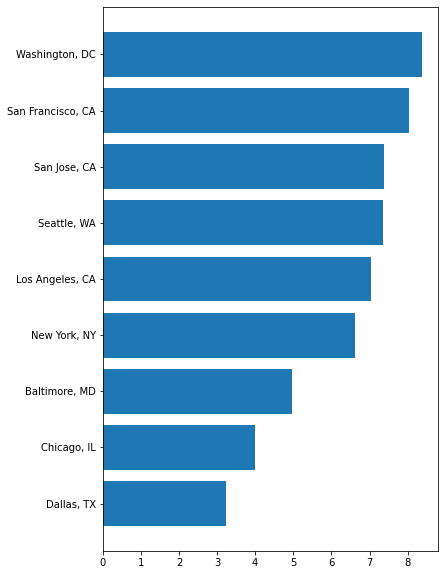

In [30]:
fig, ax = plt.subplots(figsize=(6,10))

cum_sorted = df_cum[:-2].sort_values(by=['AverageYearlyReturn(%)'], ascending = True)
plt.barh(y=cum_sorted['City'], width=cum_sorted['AverageYearlyReturn(%)'])

## Model Building

### Time series data decomposition

Here we wanted to see how different constituents of the time series breakdown after decomposition. As it seemed from the graphs above, the vast majority of the variance in the values was captured in the overall trend. It seems that seasonality really effects the prices of homes, as the scale of the seasonal decompostion was on the scale of hundreds compared to the scale of house prices being of the magnitude of hundreds of thousands. Due to the lack of seasonality, an ARIMA model should be appropriate. There was a little noise left after the decomposition, but it looked a little off. However, the residuals were considered stationary according to the Dickey Fuller test. 

In [31]:
#Decomposing
decomposition = seasonal_decompose(melted_df['Washington, DC'])

#General trend. (i.e. overtime,how does the house market change.)
trend = decomposition.trend

#Seasonal trend
seasonal = decomposition.seasonal

#This will be the leftover noise in the model.
residual = decomposition.resid

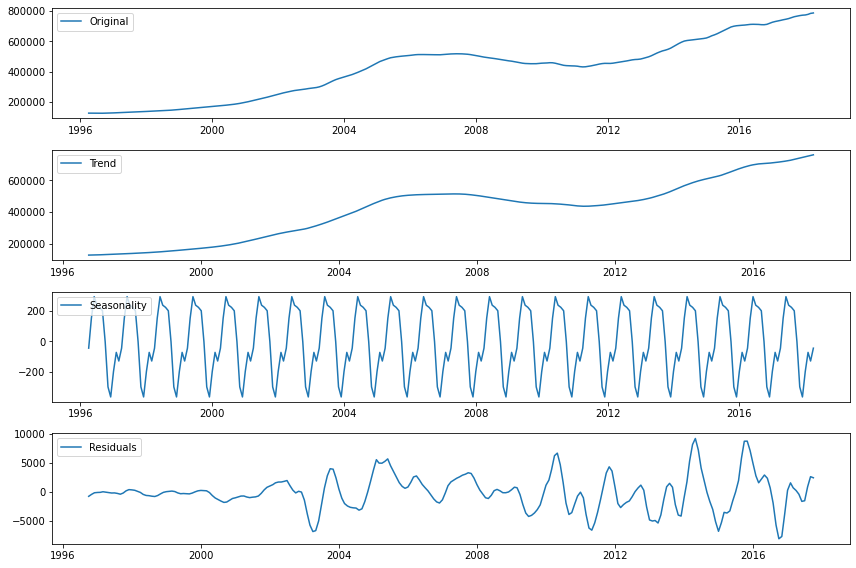

In [32]:
# Plot gathered statistics
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(melted_df['Washington, DC'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

In [33]:
# Drop NaN values from residuals.
house_ts_decompose = residual 
house_ts_decompose.dropna(inplace = True)

In [34]:
#Obtained this function from lecture 58 notebook

def display_df(dftest):
    '''
    Display the output from a Dickey-Fuller test in a more readable format
    '''
    
    
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    display(dfoutput)

In [35]:
#After we take out the trend and the seasonality, we look at the residuals with no null values.
dftest = adfuller(house_ts_decompose)

#Print out our results. 
display_df(dftest)

Test Statistic                  -4.719574
p-value                          0.000077
#Lags Used                      10.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64

### Baseline Model

Here we created a class that could get all of the relevant information from our cities. The plot_shift method will plot all of the one year shifts on a single axes. The shift df method will return a df that with three shifted periods for 1, 2, and 3 years, as well give root mean squared errors for the three different baselines. We plan on forecasting 3 years into the future, but knowing how good numbers to beat for shorter time periods is also useful. After running all the baseline models, our average root mean squared error was about $118,000.

In [36]:
class baseline_mod:
    
    def __init__(self,city='Washington, DC'):
        self.city = city
    
    def plot_shift(self,df):
        ax = df[self.city].plot(figsize=(15,10))
        df[self.city].shift(1).plot()
        df[self.city].shift(2).plot()
        df[self.city].shift(3).plot()
        ax.legend(['Original', 'shift 1', 'shift 2', 'shift 3'])
        plt.show()
        
        
    def shift_df(self, df):
        self.shifted_df = pd.DataFrame(np.hstack((df[self.city].values.reshape(-1, 1),
                                                  df[self.city].shift().values.reshape(-1, 1),
                                                  df[self.city].shift(periods=2).values.reshape(-1, 1),
                                                  df[self.city].shift(periods=3).values.reshape(-1, 1))),
                                       columns=['orig', 'shifted_one_period', 'shifted_two_periods', 'shifted_three_periods'],
                                       index=df.index)
        self.rmse_shift1_ = mean_squared_error(self.shifted_df['orig'][1:], self.shifted_df['shifted_one_period'][1:], squared=False)
        self.rmse_shift2_ = mean_squared_error(self.shifted_df['orig'][2:], self.shifted_df['shifted_two_periods'][2:], squared=False)
        self.rmse_shift3_ = mean_squared_error(self.shifted_df['orig'][3:], self.shifted_df['shifted_three_periods'][3:], squared=False)
        
       
        return self.shifted_df

        

### Washington D.C.

In [37]:
# graphing the baseline model
def baseline_graph(city):
    baseline_year = baseline_mod(city=city)
    baseline_year.plot_shift(resampled_year)

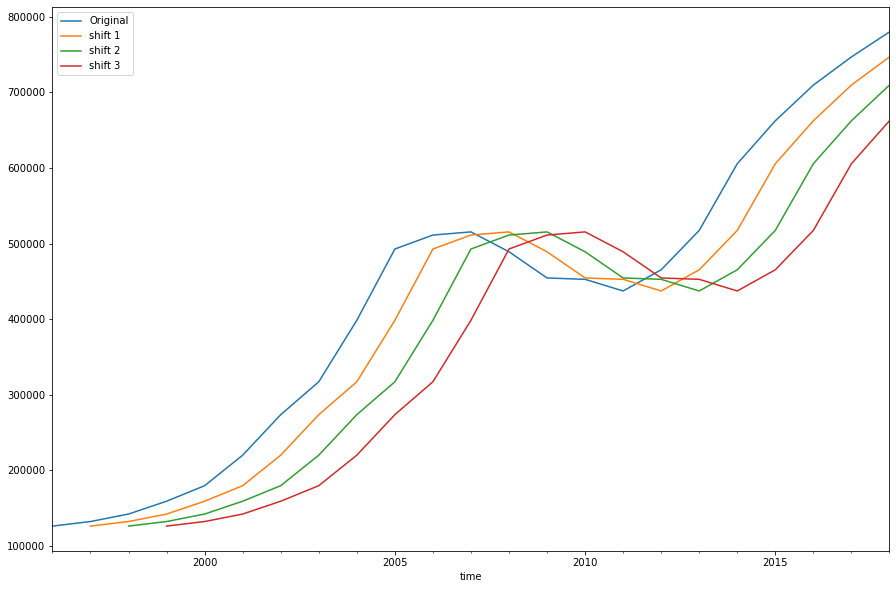

In [38]:
baseline_graph('Washington, DC')

In [39]:
# make a function to quickly get see the rmse
def see_rmse(city):
    baseline_year = baseline_mod(city=city)
    baseline_year.shift_df(resampled_year)
    print(f"RMSE shifted 1 year:{baseline_year.rmse_shift1_}")
    print(f"RMSE shifted 2 years:{baseline_year.rmse_shift2_}")
    print(f"RMSE shifted 3 years:{baseline_year.rmse_shift3_}")
# and get the rmse
def get_rmse(city):
    baseline_year = baseline_mod(city=city)
    baseline_year.shift_df(resampled_year)
    return baseline_year.rmse_shift3_

In [40]:
baseline_rmse = []
washington_rmse = get_rmse('Washington, DC')
baseline_rmse.append(washington_rmse)
see_rmse('Washington, DC')

RMSE shifted 1 year:44942.247030848586
RMSE shifted 2 years:87278.32651788132
RMSE shifted 3 years:127389.16898622112


### New York

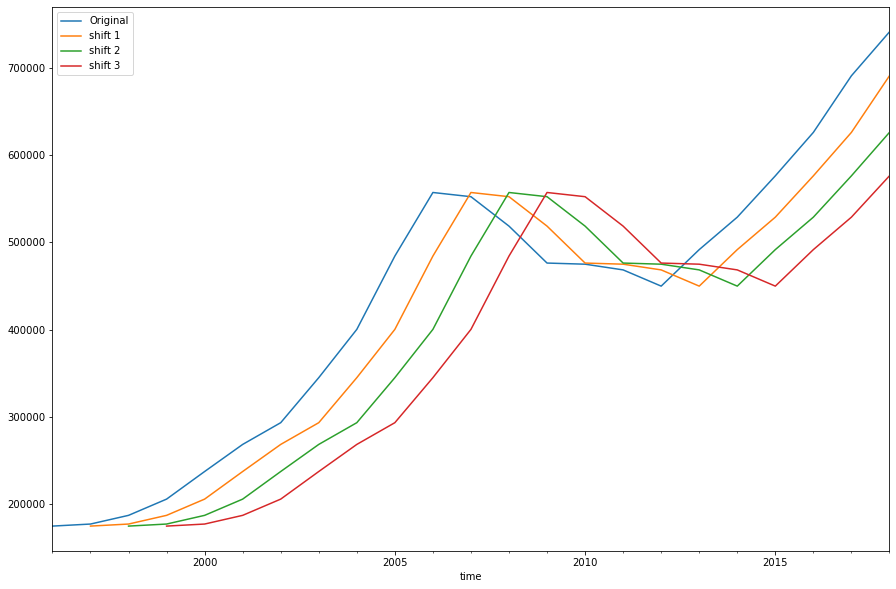

In [41]:
baseline_graph('New York, NY')

In [42]:
new_york_rmse = get_rmse('New York, NY')
baseline_rmse.append(new_york_rmse)
see_rmse('New York, NY')

RMSE shifted 1 year:42204.974663700916
RMSE shifted 2 years:80647.0468195475
RMSE shifted 3 years:114366.02205200634


### San Francisco

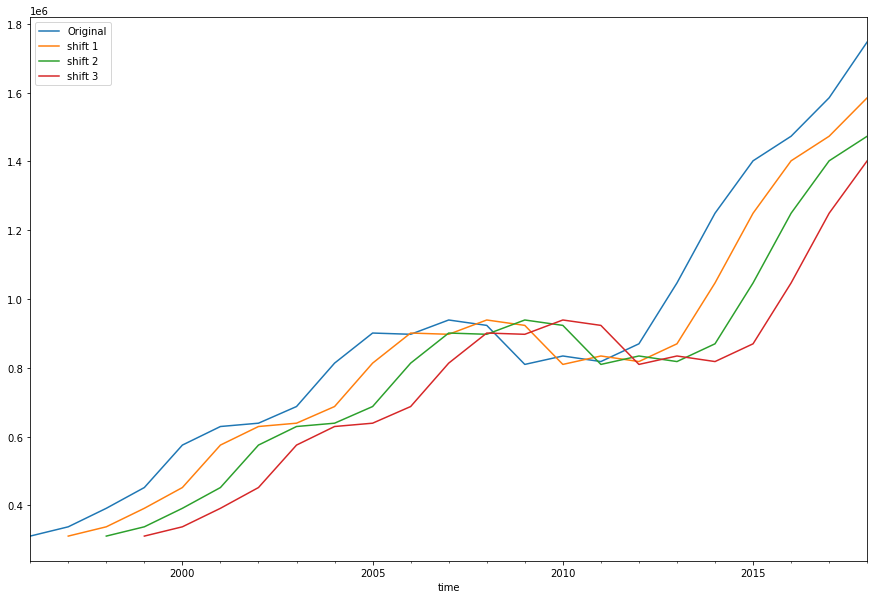

In [43]:
baseline_graph('San Francisco, CA')

In [44]:
san_francisco_rmse = get_rmse('San Francisco, CA')
baseline_rmse.append(san_francisco_rmse)
see_rmse('San Francisco, CA')

RMSE shifted 1 year:97600.79347199814
RMSE shifted 2 years:180645.4877983526
RMSE shifted 3 years:255531.38310195872


### Seattle

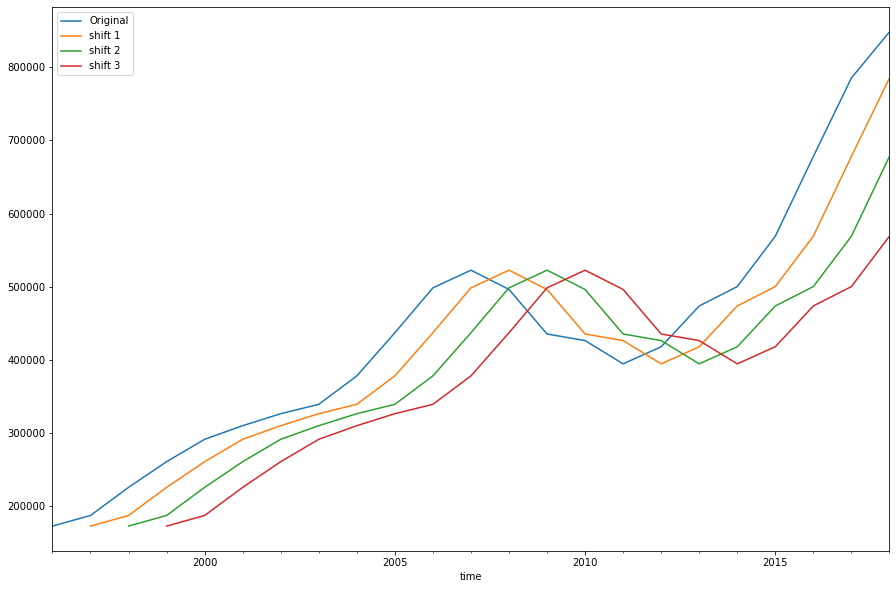

In [45]:
baseline_graph('Seattle, WA')

In [46]:
seattle_rmse = get_rmse('Seattle, WA')
baseline_rmse.append(seattle_rmse)
see_rmse('Seattle, WA')

RMSE shifted 1 year:50400.987544437514
RMSE shifted 2 years:96285.5364206355
RMSE shifted 3 years:134135.72184545026


### Dallas

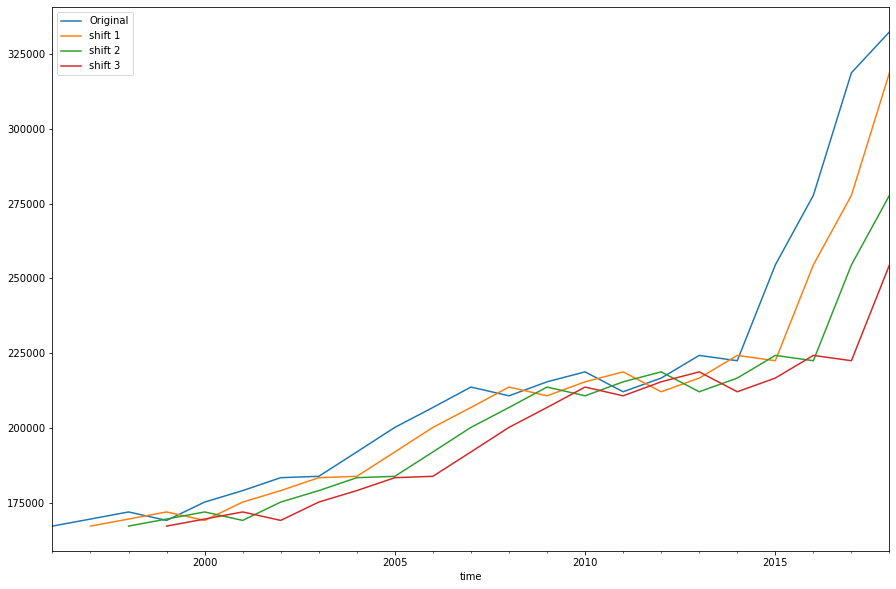

In [47]:
baseline_graph('Dallas, TX')

In [48]:
dallas_rmse = get_rmse('Dallas, TX')
baseline_rmse.append(dallas_rmse)
see_rmse('Dallas, TX')

RMSE shifted 1 year:13330.761589101146
RMSE shifted 2 years:24214.157360244164
RMSE shifted 3 years:32990.72644319916


### Los Angeles

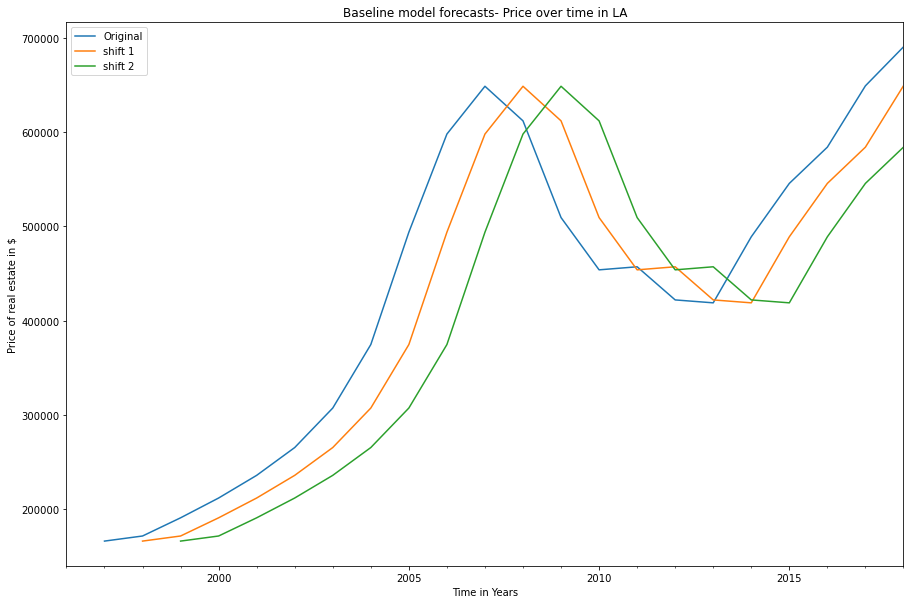

In [49]:
# Saved the figure for illustration purpose in the ReadMe
fig, ax = plt.subplots(figsize=(15,10))
resampled_year['Los Angeles, CA'].shift(1).plot()
resampled_year['Los Angeles, CA'].shift(2).plot()
resampled_year['Los Angeles, CA'].shift(3).plot()
ax.legend(['Original', 'shift 1', 'shift 2', 'shift 3'])
ax.set_xlabel('Time in Years')
ax.set_ylabel('Price of real estate in $')
ax.set_title('Baseline model forecasts- Price over time in LA')
fig.savefig('figures/baselineLA.jpeg', dpi=500)

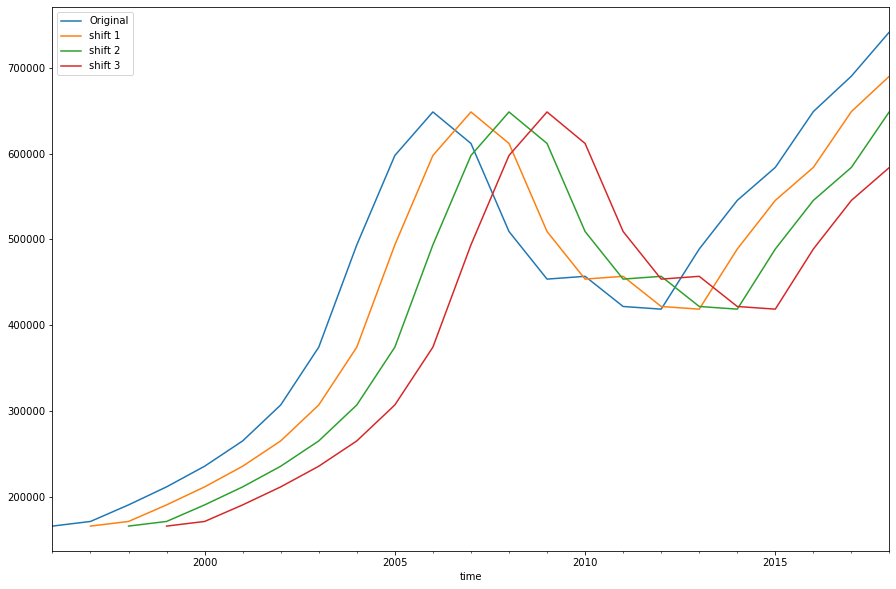

In [50]:
baseline_graph('Los Angeles, CA')

In [51]:
los_angeles_rmse = get_rmse('Los Angeles, CA')
baseline_rmse.append(los_angeles_rmse)
see_rmse('Los Angeles, CA')

RMSE shifted 1 year:56643.61975625242
RMSE shifted 2 years:107524.3184010903
RMSE shifted 3 years:151579.98012600475


### San Jose

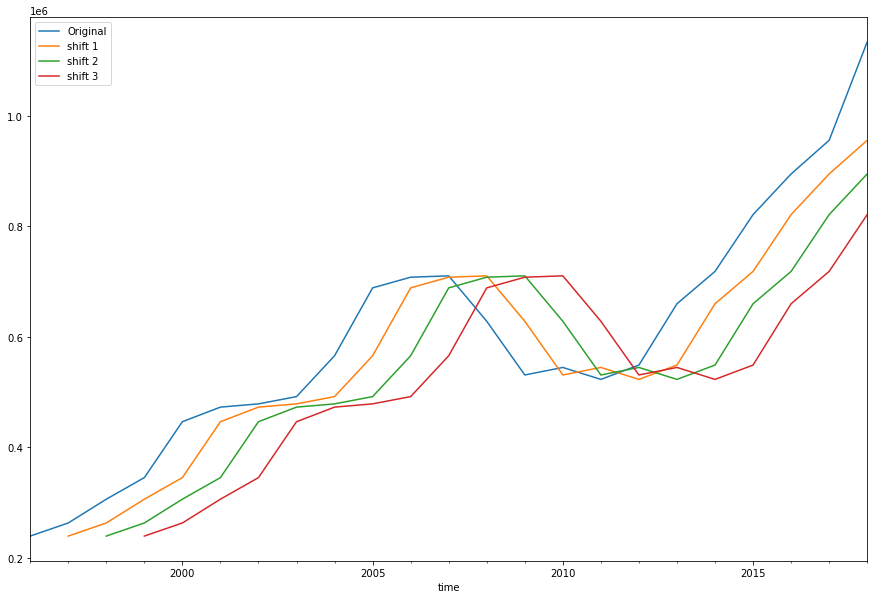

In [52]:
baseline_graph('San Jose, CA')

In [53]:
san_jose_rmse = get_rmse('San Jose, CA')
baseline_rmse.append(san_jose_rmse)
see_rmse('San Jose, CA')

RMSE shifted 1 year:74149.65748097192
RMSE shifted 2 years:127554.68528476419
RMSE shifted 3 years:176456.14079708306


### Chicago

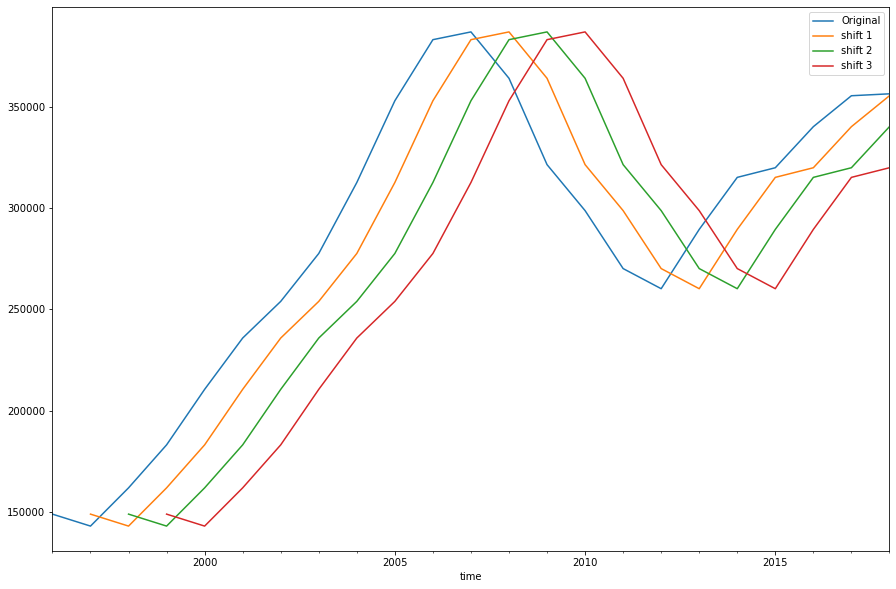

In [54]:
baseline_graph('Chicago, IL')

In [55]:
chicago_rmse = get_rmse('Chicago, IL')
baseline_rmse.append(chicago_rmse)
see_rmse('Chicago, IL')

RMSE shifted 1 year:24148.96831035532
RMSE shifted 2 years:46402.85872248657
RMSE shifted 3 years:66473.04575916467


### Baltimore

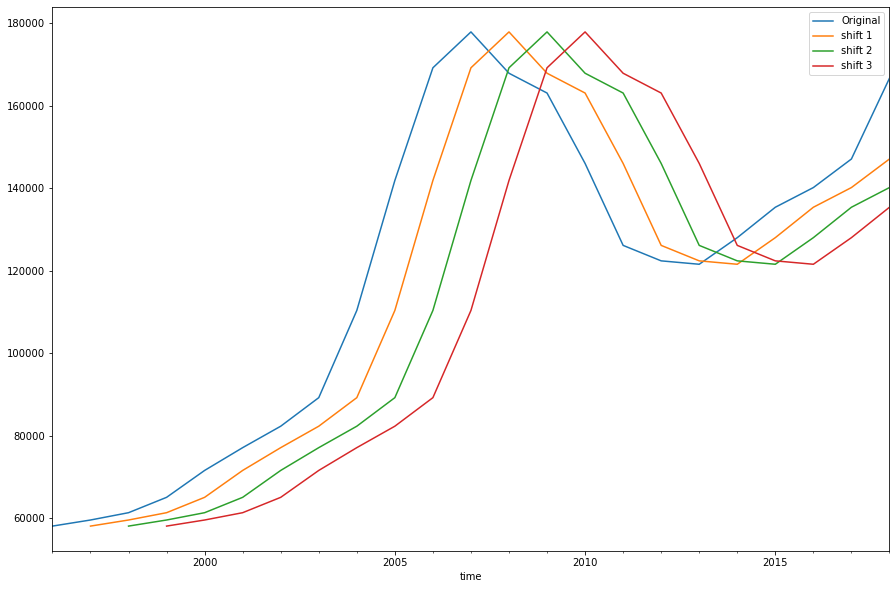

In [56]:
baseline_graph('Baltimore, MD')

In [57]:
baltimore_rmse = get_rmse('Baltimore, MD')
baseline_rmse.append(baltimore_rmse)
see_rmse('Baltimore, MD')

RMSE shifted 1 year:13152.216370427665
RMSE shifted 2 years:24621.963192007486
RMSE shifted 3 years:34829.95298589994


### Boston

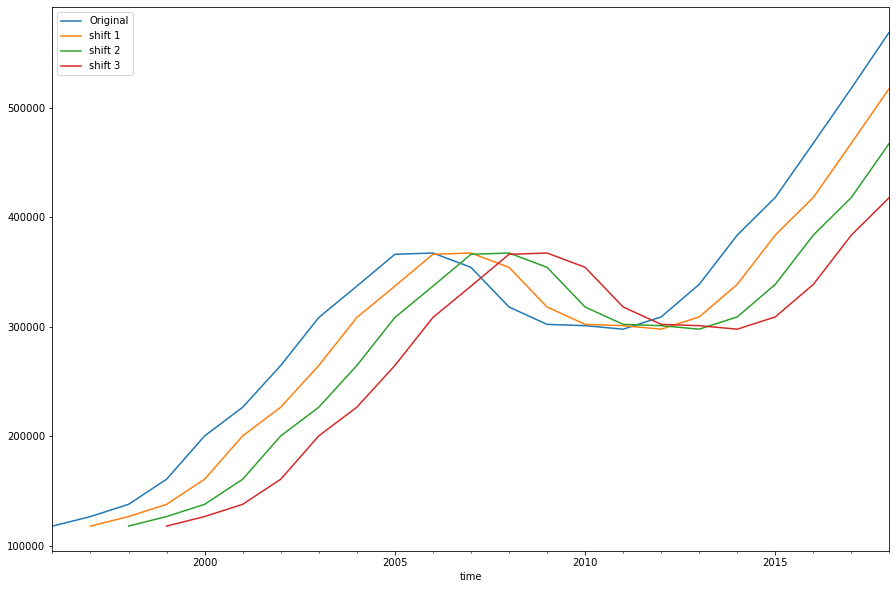

In [58]:
baseline_graph('Boston, MA')

In [59]:
boston_rmse = get_rmse('Boston, MA')
baseline_rmse.append(boston_rmse)
see_rmse('Boston, MA')

RMSE shifted 1 year:31303.32223510063
RMSE shifted 2 years:60369.33893404278
RMSE shifted 3 years:87084.18753568297


In [60]:
# average rmse from the 10 cities
np.mean(baseline_rmse)

118083.63296326711

### ARIMA model

In [61]:
# used this helper function to give a frequency attribute to our data frame
def add_freq(idx, freq=None):
    """Add a frequency attribute to idx, through inference or directly.

    Returns a copy.  If `freq` is None, it is inferred.
    """

    idx = idx.copy()
    if freq is None:
        if idx.freq is None:
            freq = pd.infer_freq(idx)
        else:
            return idx
    idx.freq = pd.tseries.frequencies.to_offset(freq)
    if idx.freq is None:
        raise AttributeError('no discernible frequency found to `idx`.  Specify'
                             ' a frequency string with `freq`.')
    return idx

In [62]:
#We are adding frequency attribute to our dataframe index. 
melted_df.index = add_freq(melted_df.index)
#Check the length of our dataframe and proportion of testing data
36 / len(melted_df)

0.13584905660377358

We need to split the data into a training split and testing split. We intend our model to be able to predict house prices for the next three years, so it makes intuitive sense to make the testing data three years of prices. This will also allow give us a better idea of our performance on the data, as we won't be compared to markets further than three years in the future. We created a class that will fit an ARIMA model to a city's time series training data, summarize the model, make predictions for the testing data, plot those predictions versus the ground truth, and return a root mean squared error for the predictions. We ran through several different values in the ARIMA model and found that a p, d, q of 1, 2, 3 gave us the smallest combined root mean squared error for all the different cities. Our model ended up with an average RMSE of about $33,500 compared to the $118,000 of the baseline model, a huge improvement.

In [63]:
# make all but the last 3 years of data the training split
train = melted_df.iloc[:-36]
test = melted_df.iloc[-36:]

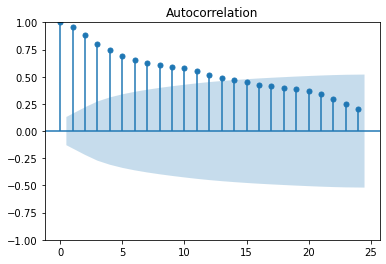

In [64]:
#Plotting the acf for Washington DC 
plot_acf(train['Washington, DC'].diff().dropna());

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



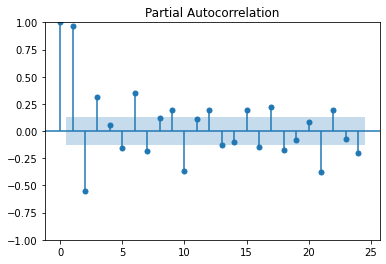

In [65]:
#Plotted our PACF for Washington DC
plot_pacf(train['Washington, DC'].diff().dropna());

In [66]:
class arima_mod: 
    
    def __init__(self, city = 'Washington, DC'):
        self.city = city 

        
    def model(self, df_train, df_test,p,d,q):
        #Fitting our model using ARIMA and instantiating it
        self.model_fit = ARIMA(df_train[self.city], order = [p,d,q]).fit()
        #Creating our prediction 
        self.y_hat_test_ = self.model_fit.predict(start=df_test[self.city].index[0], 
                                                  end=df_test[self.city].index[-1],typ='levels')
        self.model_summary_ = self.model_fit.summary()
        self.rmse_ = mean_squared_error(df_test[self.city],
                                        self.y_hat_test_,
                                        squared=False)
        print(self.model_summary_)
        print('-'*23)
        print('-'*23)
        print(f'RMSE: {self.rmse_}')
    
    def plot(self, df_test):
        fig, ax = plt.subplots(figsize = (12,8)) 
        ax.plot(df_test[self.city])
        ax.plot(self.y_hat_test_)
        ax.legend(['Original', 'Predicted'])
        ax.set_title(f'Original vs Predicted home values for {self.city}')

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  229
Model:                 ARIMA(2, 1, 5)   Log Likelihood               -2816.379
Date:                Fri, 13 May 2022   AIC                           5648.758
Time:                        12:02:24   BIC                           5676.193
Sample:                    04-01-1996   HQIC                          5659.827
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4499      5.249      0.086      0.932      -9.839      10.738
ar.L2          0.4827      5.014      0.096      0.923      -9.345      10.310
ma.L1         -0.2105      5.250     -0.040      0.9

                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  229
Model:                 ARIMA(2, 1, 5)   Log Likelihood               -1945.752
Date:                Fri, 13 May 2022   AIC                           3907.503
Time:                        12:02:27   BIC                           3934.938
Sample:                    04-01-1996   HQIC                          3918.572
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9218     24.478      0.038      0.970     -47.054      48.897
ar.L2         -0.2645     12.312     -0.021      0.983     -24.396      23.867
ma.L1         -0.8979     24.478     -0.037      0.9

                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  229
Model:                 ARIMA(2, 1, 5)   Log Likelihood               -1882.176
Date:                Fri, 13 May 2022   AIC                           3780.352
Time:                        12:02:31   BIC                           3807.787
Sample:                    04-01-1996   HQIC                          3791.421
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5206      3.942      0.386      0.700      -6.206       9.247
ar.L2         -0.5489      3.682     -0.149      0.881      -7.765       6.667
ma.L1         -1.3419      3.943     -0.340      0.7

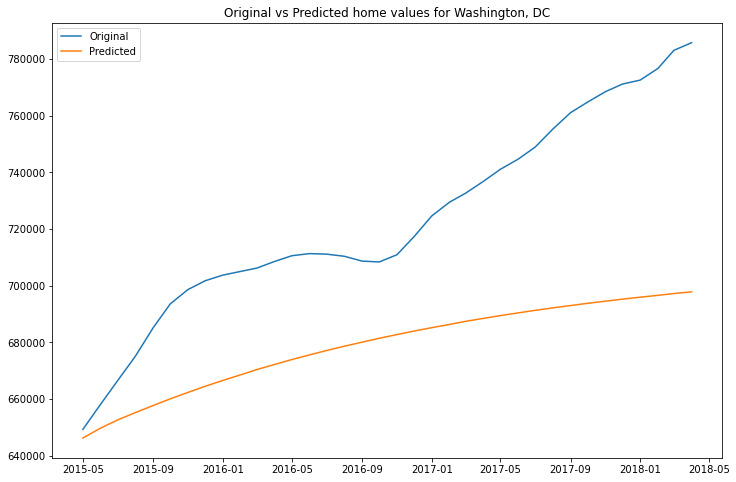

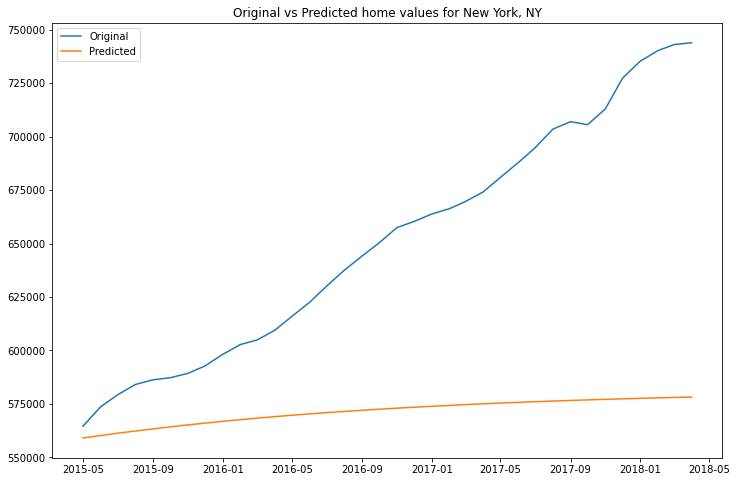

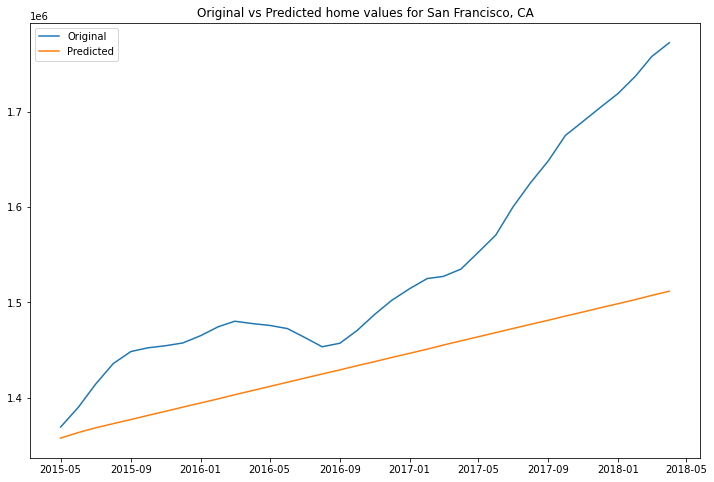

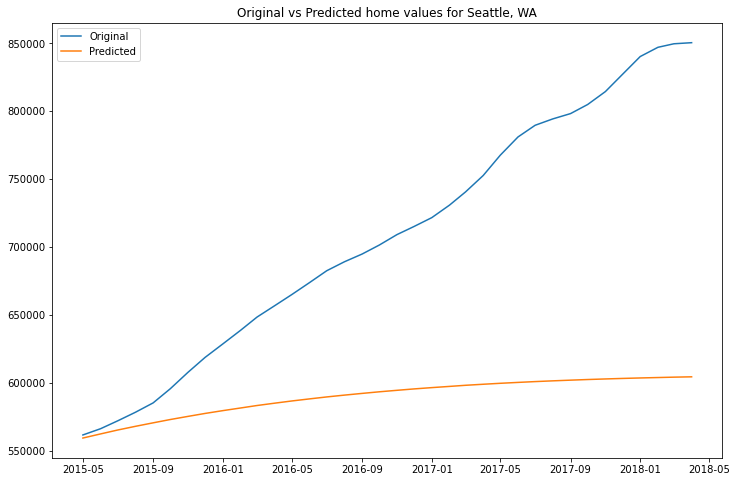

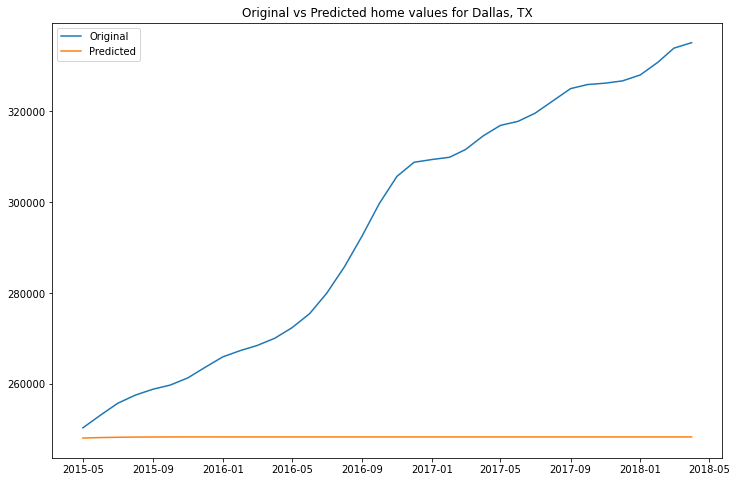

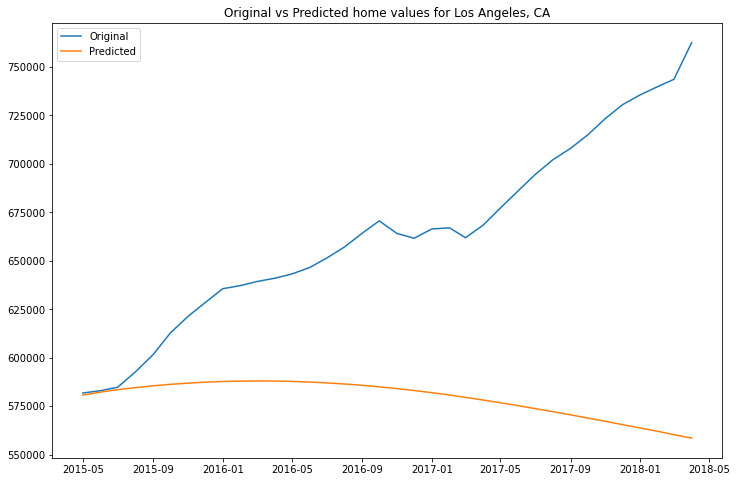

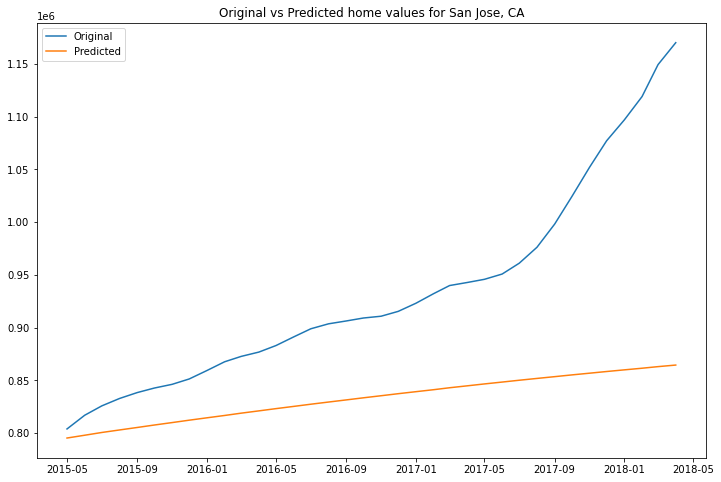

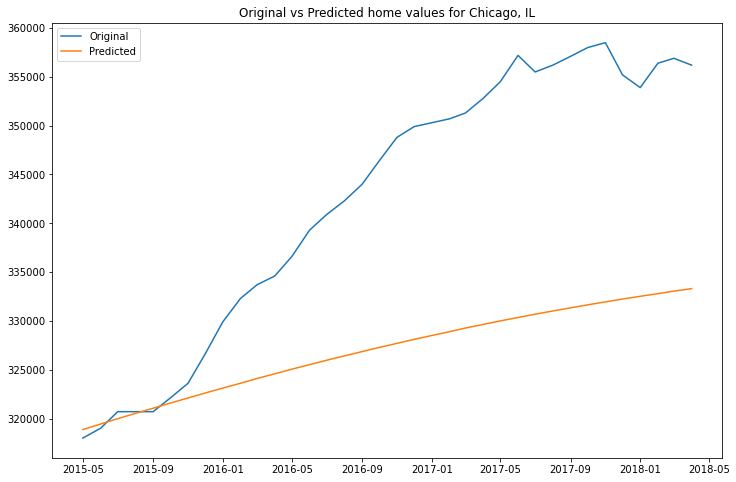

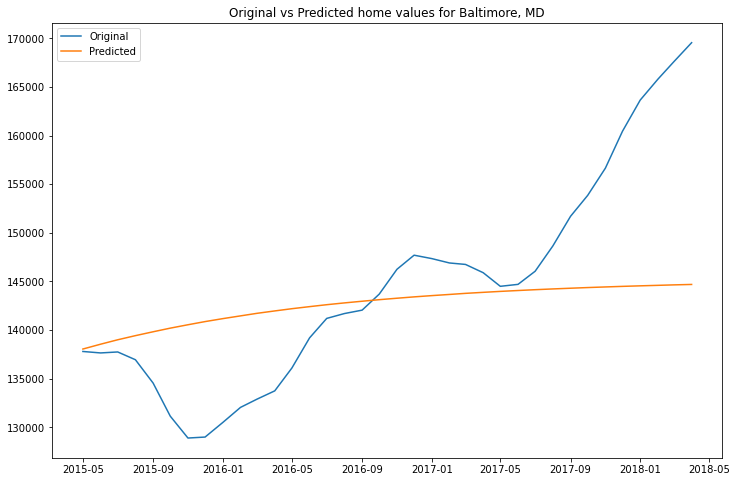

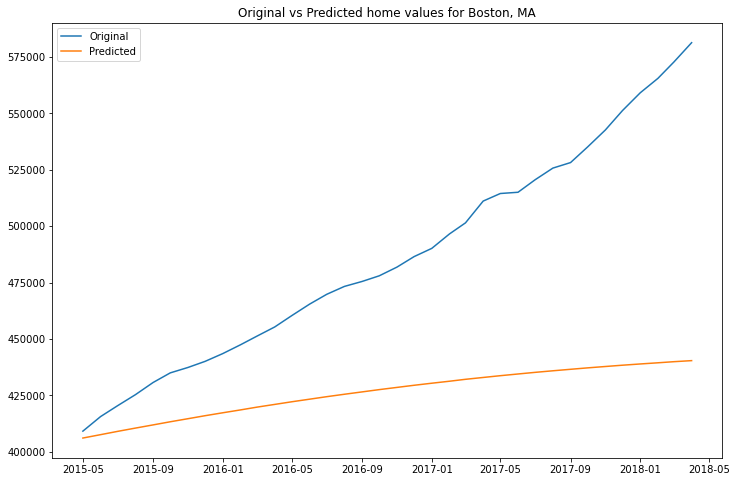

In [67]:
# based on our acf and pacf graphs, it seems that 2, 1, 5 would be a good start for our graphs.
rmse_list = []
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 2,1,5)
    city_model.plot(test)
    rmse_list.append(city_model.rmse_)

In [68]:
# the mean of the rmse for every city
np.mean(rmse_list)

78616.15666894638

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  229
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2141.888
Date:                Fri, 13 May 2022   AIC                           4289.777
Time:                        12:02:36   BIC                           4300.065
Sample:                    04-01-1996   HQIC                          4293.928
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9498      0.015     62.956      0.000       0.920       0.979
ma.L1         -0.8895      0.021    -41.807      0.000      -0.931      -0.848
sigma2      8.028e+06   4.19e-10   1.92e+16      0.0

                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  229
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2217.648
Date:                Fri, 13 May 2022   AIC                           4441.295
Time:                        12:02:38   BIC                           4451.583
Sample:                    04-01-1996   HQIC                          4445.446
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9296      0.018     51.030      0.000       0.894       0.965
ma.L1         -0.8611      0.024    -35.795      0.000      -0.908      -0.814
sigma2      1.603e+07   1.08e-10   1.49e+17      0.0

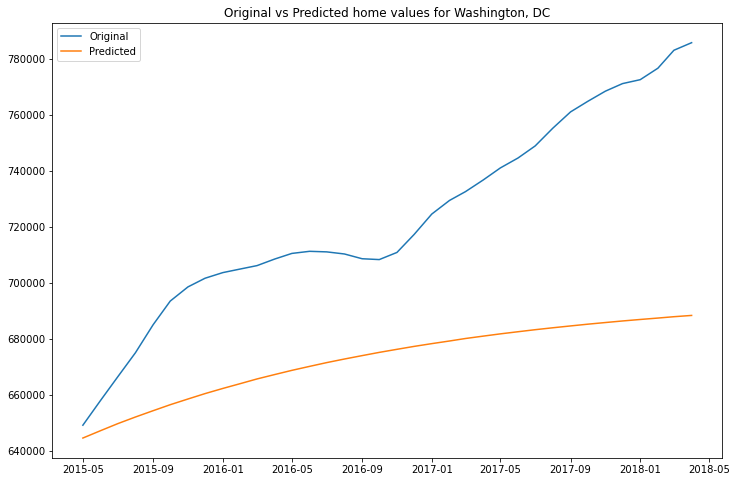

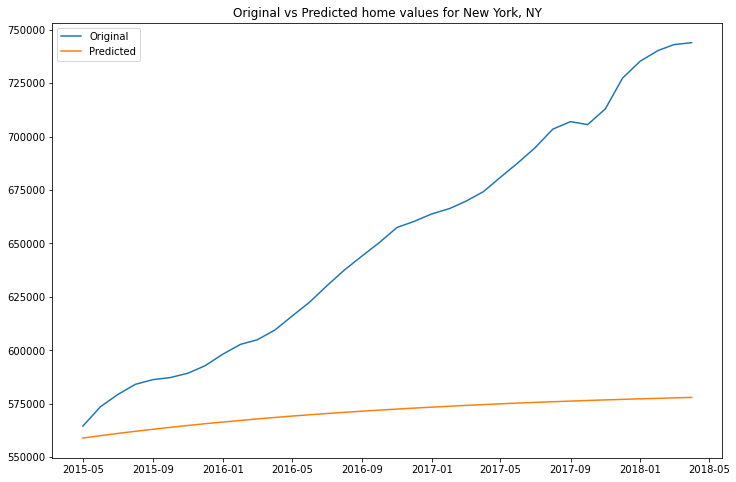

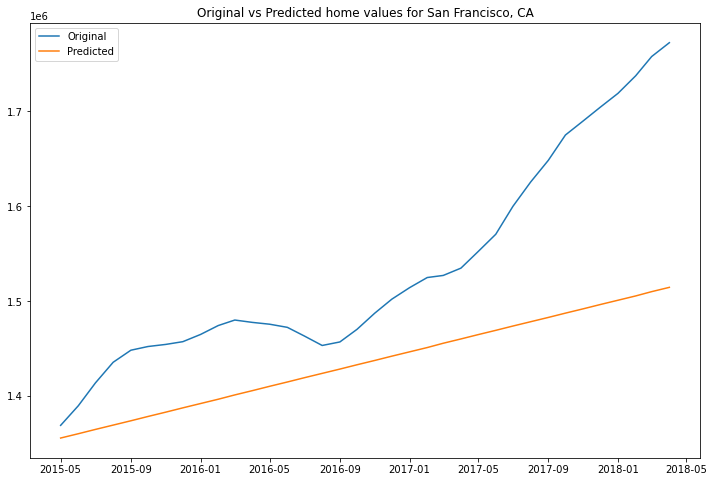

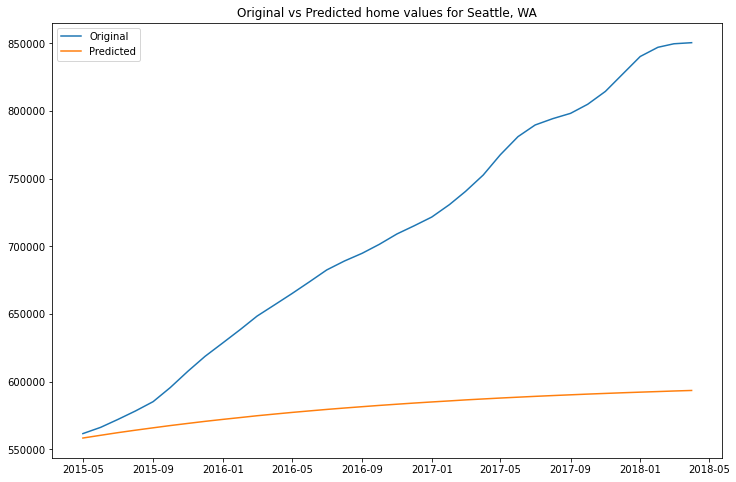

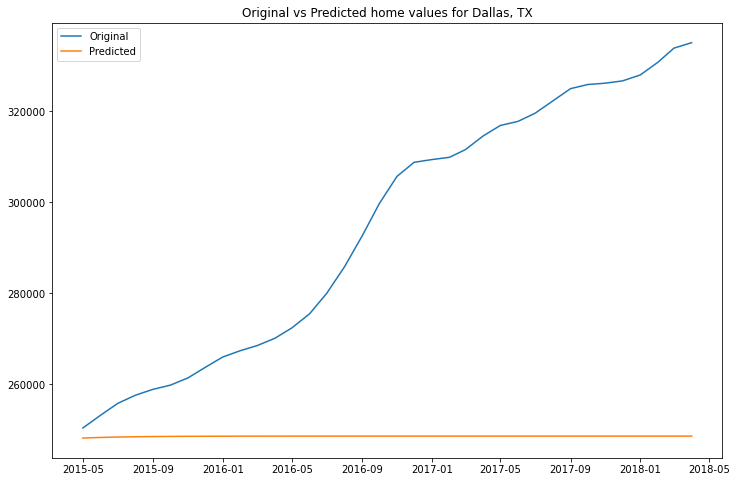

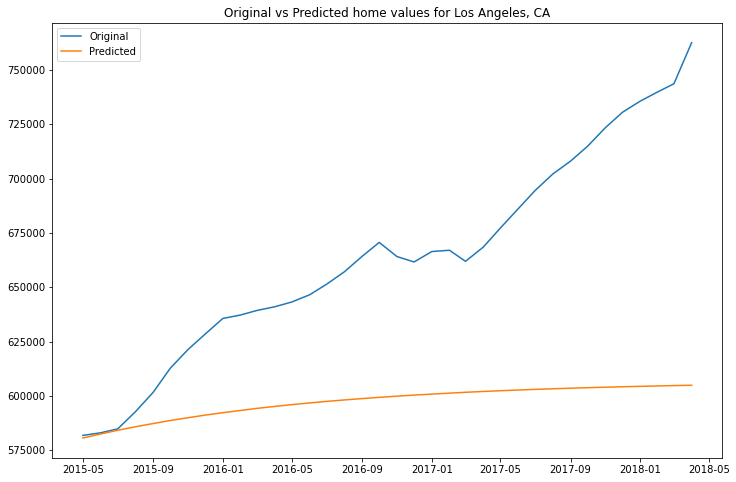

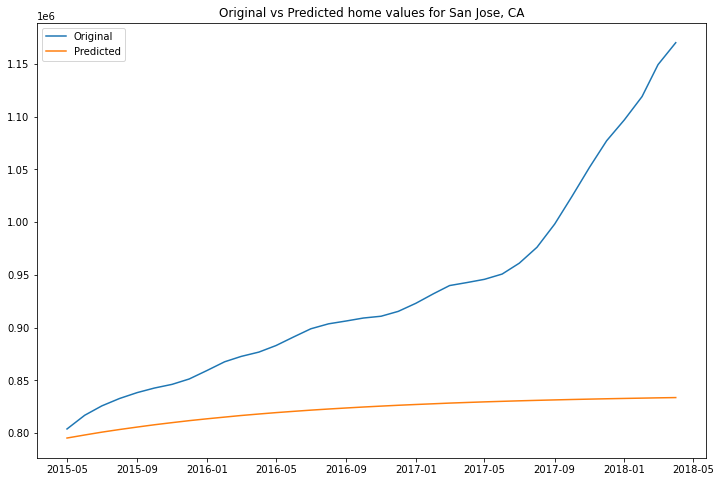

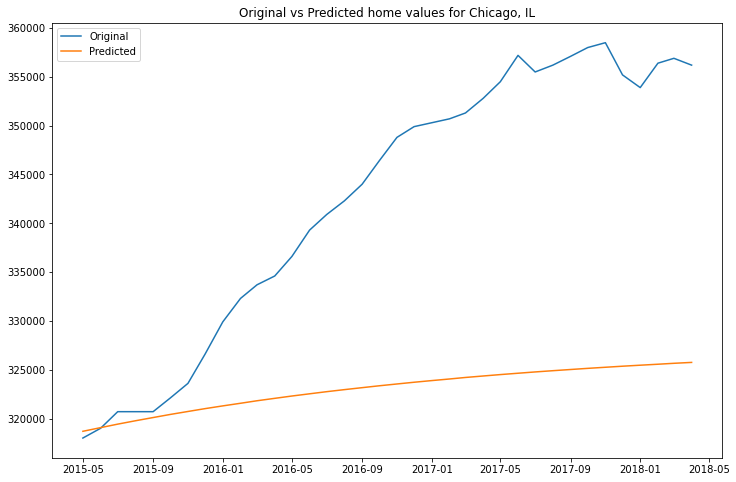

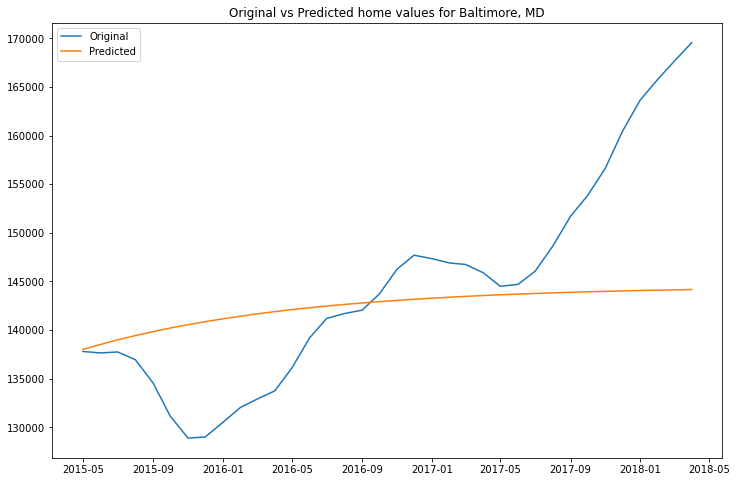

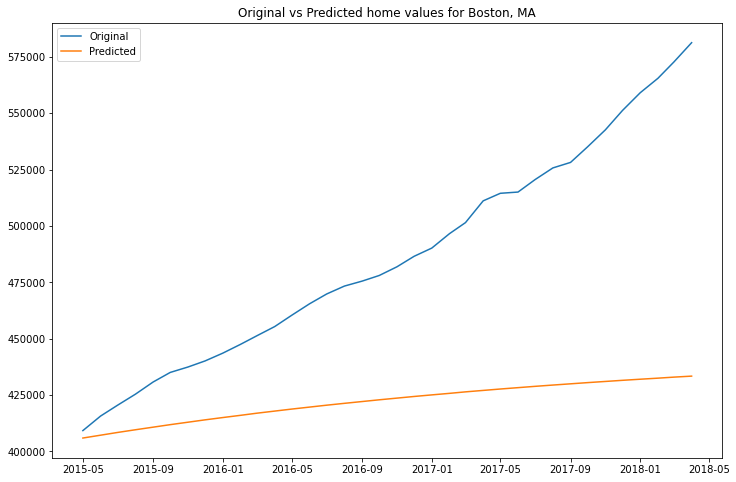

In [69]:
# The previous graphs were pretty rough, and the rmse was as well, something more simple
rmse_list = []
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 1, 1, 1)
    city_model.plot(test)
    rmse_list.append(city_model.rmse_)

In [70]:
# mean rmse for every city
np.mean(rmse_list)

80278.61371440972

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  229
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1863.778
Date:                Fri, 13 May 2022   AIC                           3733.555
Time:                        12:02:43   BIC                           3743.830
Sample:                    04-01-1996   HQIC                          3737.701
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1994      0.432      0.462      0.644      -0.646       1.045
ma.L1         -0.1372      0.423     -0.324      0.746      -0.967       0.693
sigma2      5.622e+05   2.49e+04     22.608      0.0

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  229
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -2126.436
Date:                Fri, 13 May 2022   AIC                           4258.872
Time:                        12:02:43   BIC                           4269.147
Sample:                    04-01-1996   HQIC                          4263.018
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8473      0.027     30.960      0.000       0.794       0.901
ma.L1         -0.9853      0.014    -71.397      0.000      -1.012      -0.958
sigma2      8.086e+06   1.06e-09   7.61e+15      0.0

                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  229
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1864.111
Date:                Fri, 13 May 2022   AIC                           3734.222
Time:                        12:02:46   BIC                           3744.497
Sample:                    04-01-1996   HQIC                          3738.368
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0752      1.533     -0.049      0.961      -3.079       2.929
ma.L1          0.0926      1.526      0.061      0.952      -2.899       3.084
sigma2      7.567e+05   2.98e+04     25.410      0.0

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  229
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1993.712
Date:                Fri, 13 May 2022   AIC                           3993.424
Time:                        12:02:47   BIC                           4003.698
Sample:                    04-01-1996   HQIC                          3997.570
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8550      0.078     10.893      0.000       0.701       1.009
ma.L1         -0.9447      0.064    -14.857      0.000      -1.069      -0.820
sigma2      2.507e+06   8.82e+04     28.433      0.0

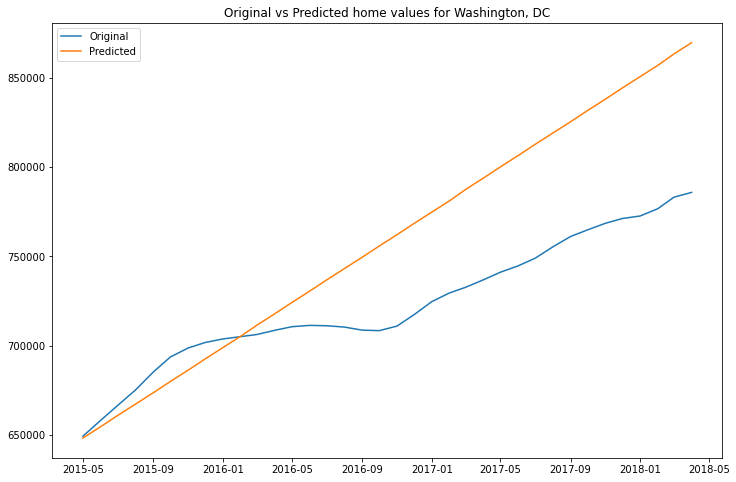

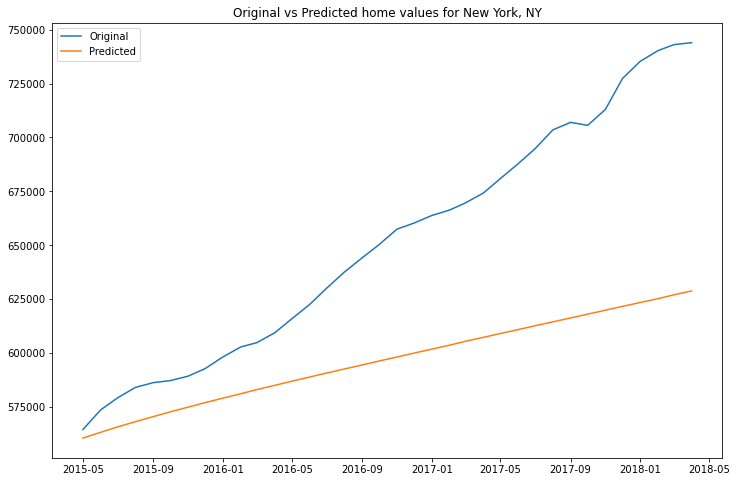

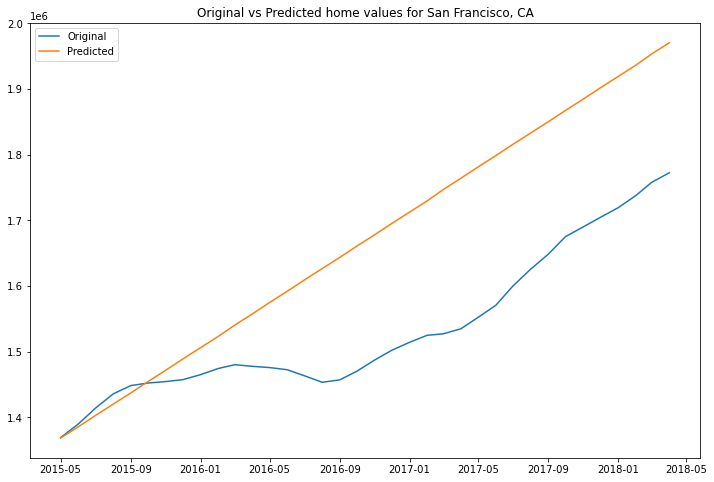

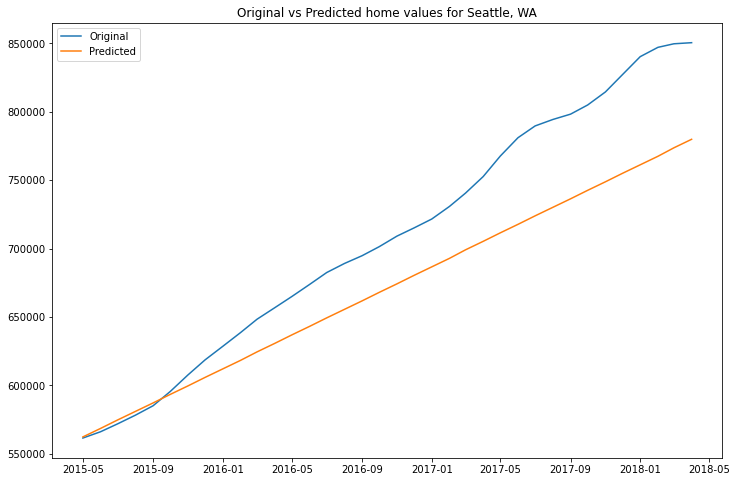

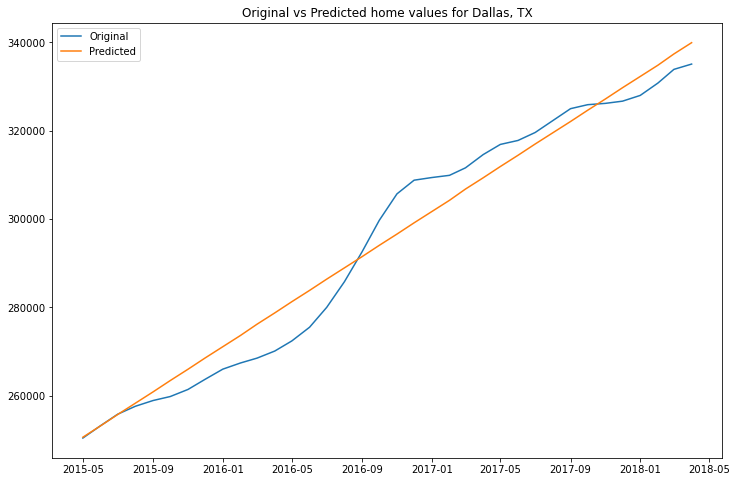

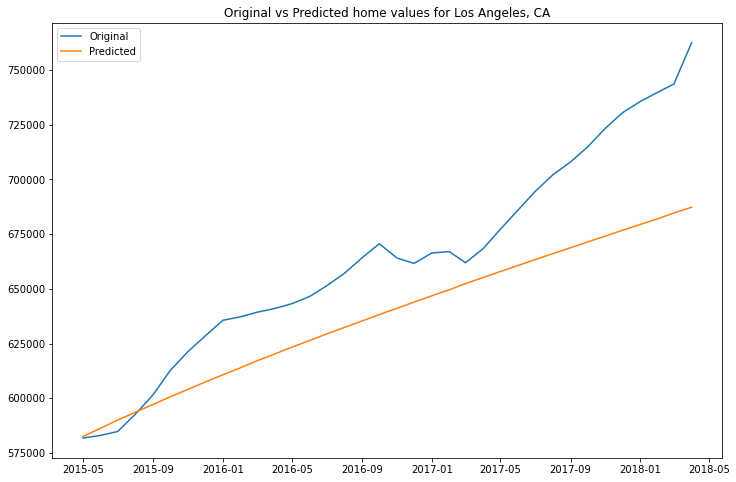

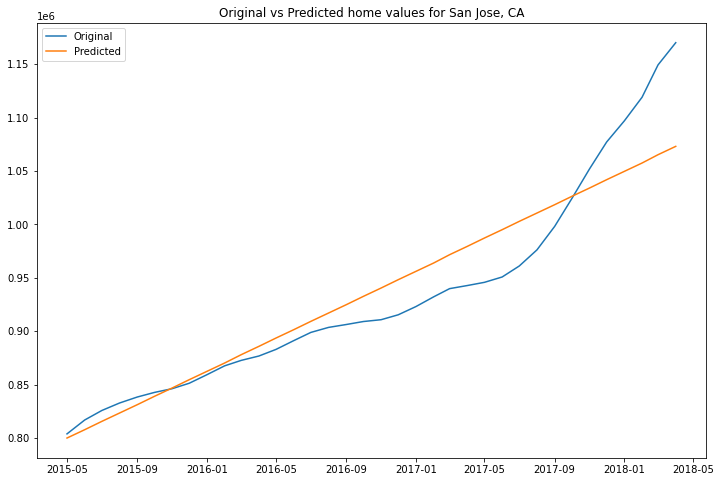

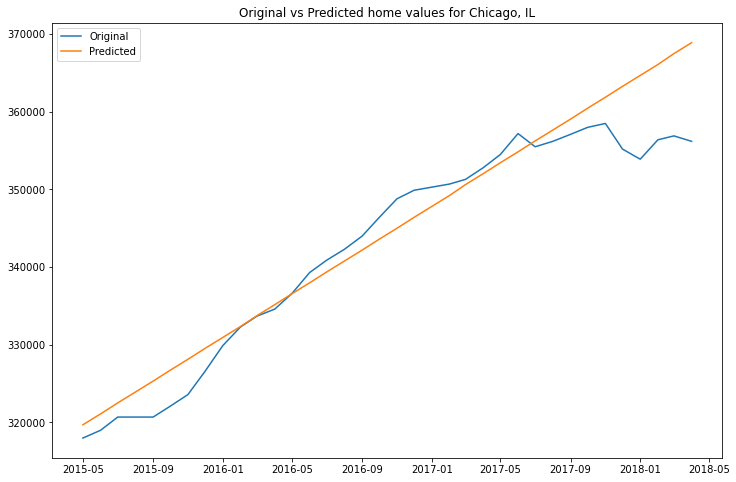

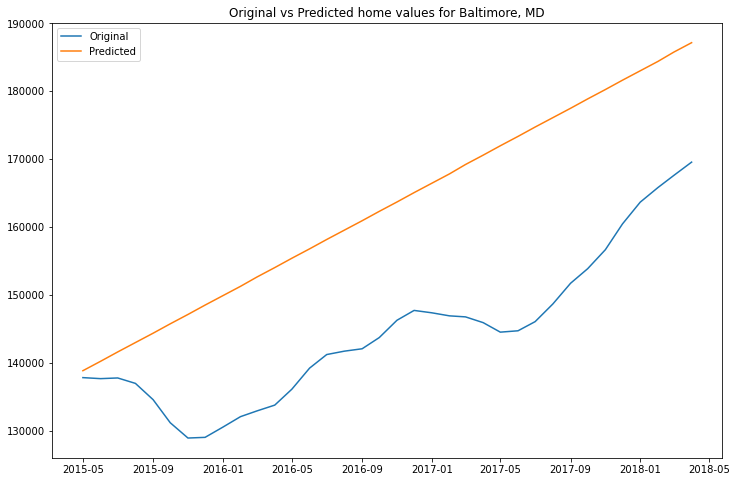

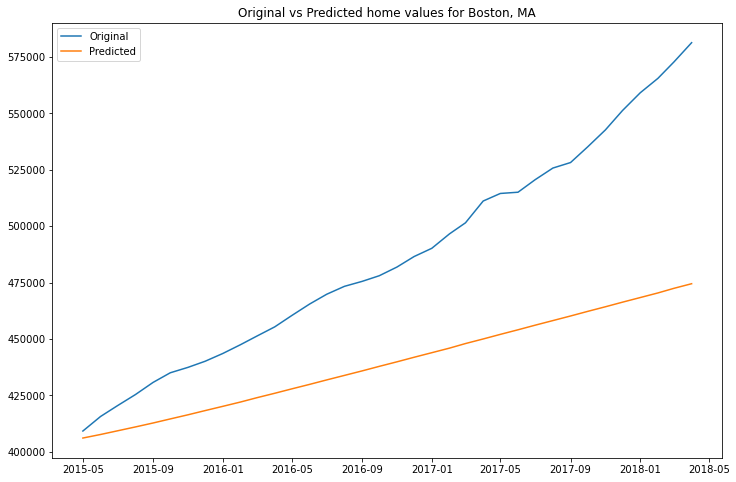

In [71]:
# still pretty rough, try increasing the differencing
rmse_list = []
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 1,2,1)
    city_model.plot(test)
    rmse_list.append(city_model.rmse_)

In [72]:
# big improvement, still needs work
np.mean(rmse_list)

46714.82935886177

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  229
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1859.012
Date:                Fri, 13 May 2022   AIC                           3726.025
Time:                        12:02:51   BIC                           3739.725
Sample:                    04-01-1996   HQIC                          3731.553
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4563      2.210     -0.206      0.836      -4.788       3.875
ma.L1          0.4987      2.206      0.226      0.821      -3.825       4.822
ma.L2          0.0325      0.083      0.389      0.6

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  229
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -2127.068
Date:                Fri, 13 May 2022   AIC                           4262.135
Time:                        12:02:52   BIC                           4275.835
Sample:                    04-01-1996   HQIC                          4267.663
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8268      0.040     20.814      0.000       0.749       0.905
ma.L1         -0.9617      0.057    -16.747      0.000      -1.074      -0.849
ma.L2         -0.0212      0.057     -0.372      0.7

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  229
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1956.044
Date:                Fri, 13 May 2022   AIC                           3920.088
Time:                        12:02:53   BIC                           3933.788
Sample:                    04-01-1996   HQIC                          3925.616
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7799      0.782      0.998      0.318      -0.752       2.312
ma.L1         -0.8162      0.784     -1.042      0.298      -2.352       0.720
ma.L2          0.0085      0.030      0.284      0.7

                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  229
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1993.378
Date:                Fri, 13 May 2022   AIC                           3994.756
Time:                        12:02:55   BIC                           4008.456
Sample:                    04-01-1996   HQIC                          4000.285
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8093      0.098      8.245      0.000       0.617       1.002
ma.L1         -0.8958      0.092     -9.705      0.000      -1.077      -0.715
ma.L2         -0.0217      0.043     -0.504      0.6

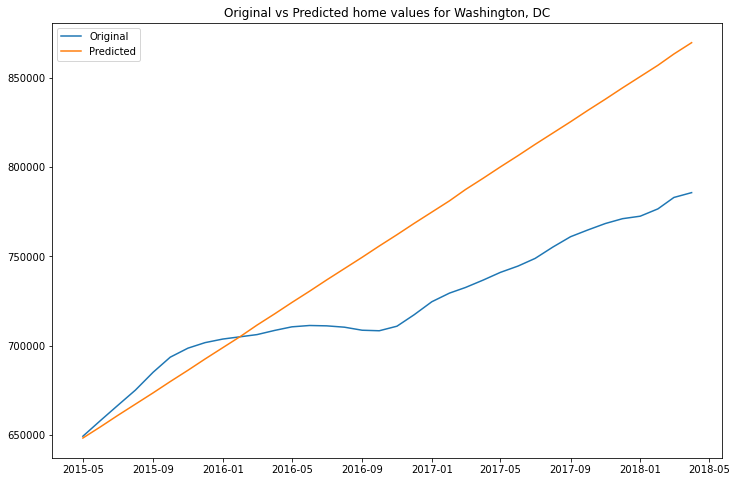

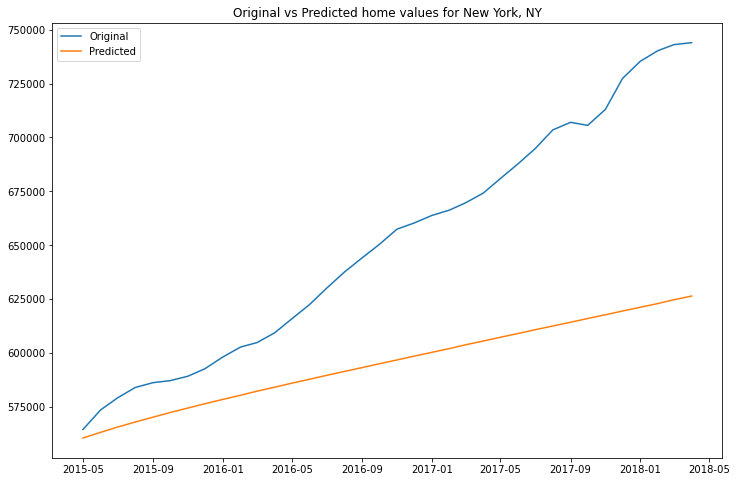

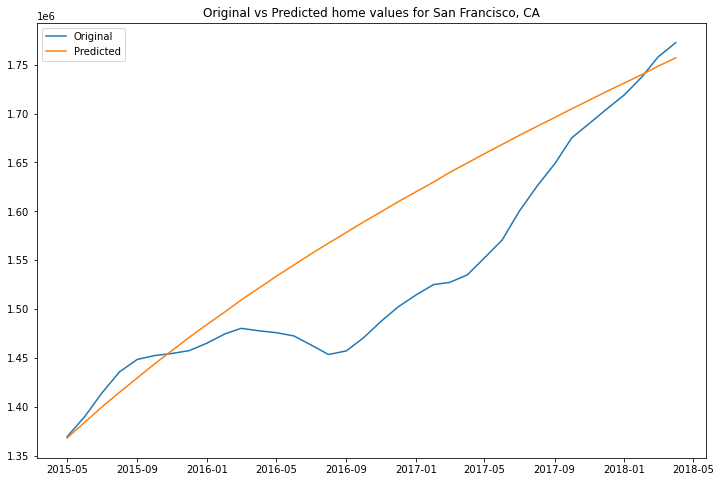

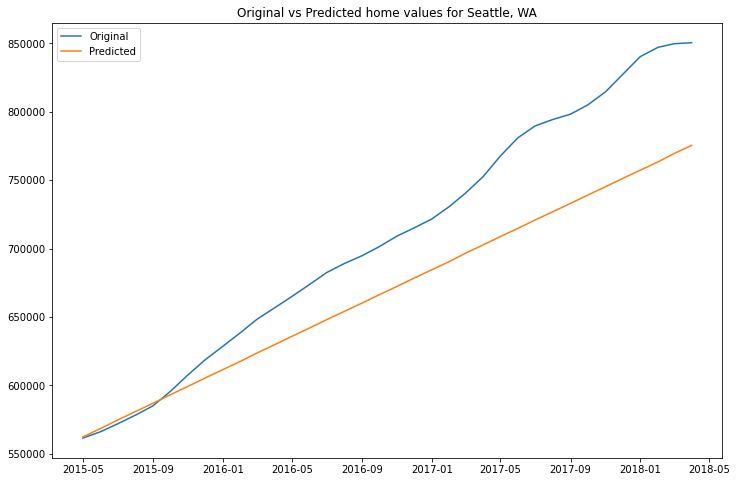

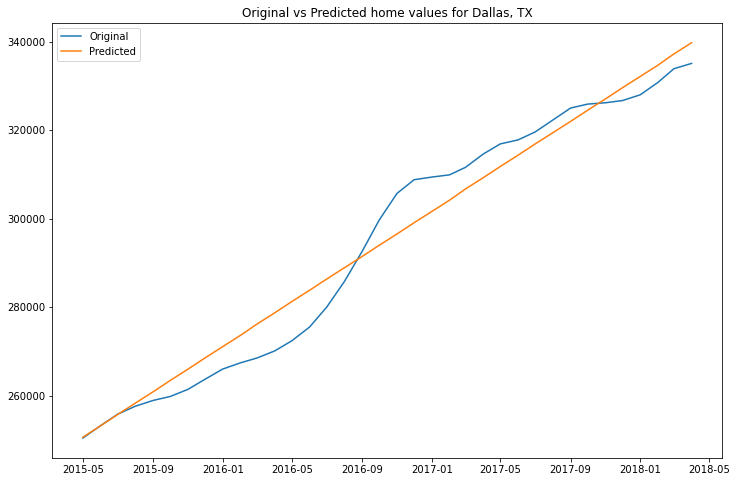

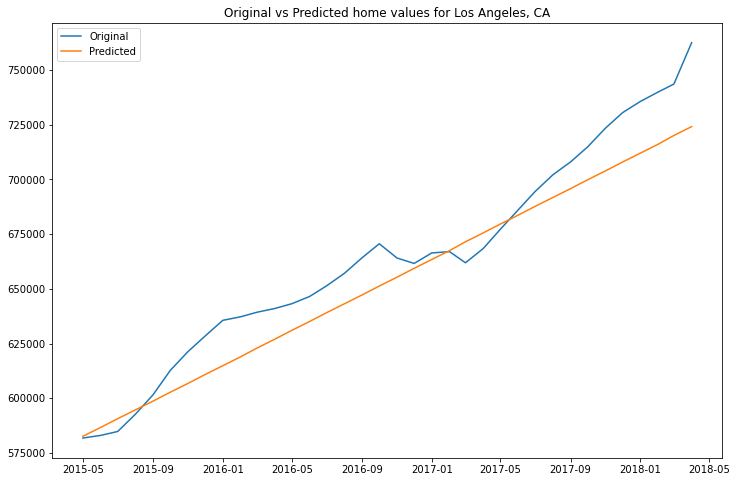

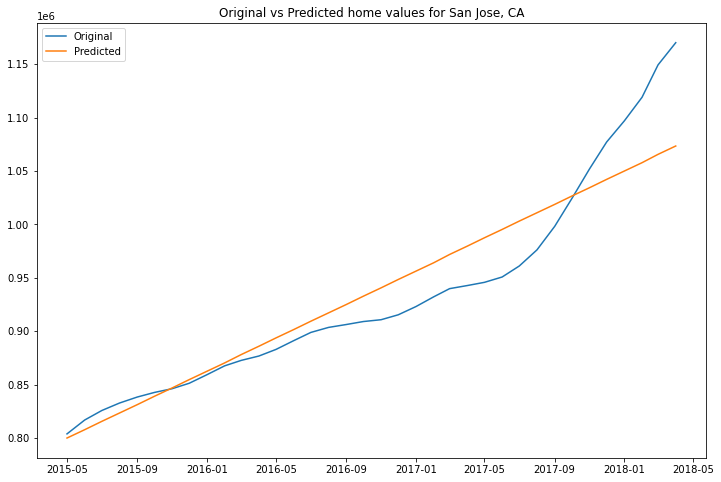

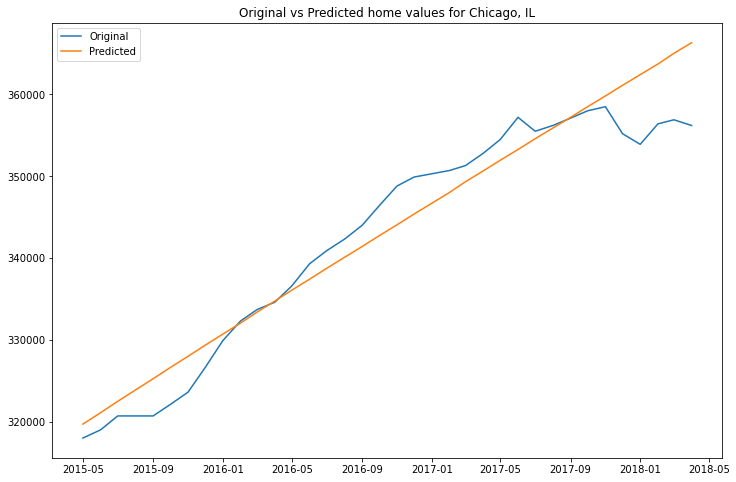

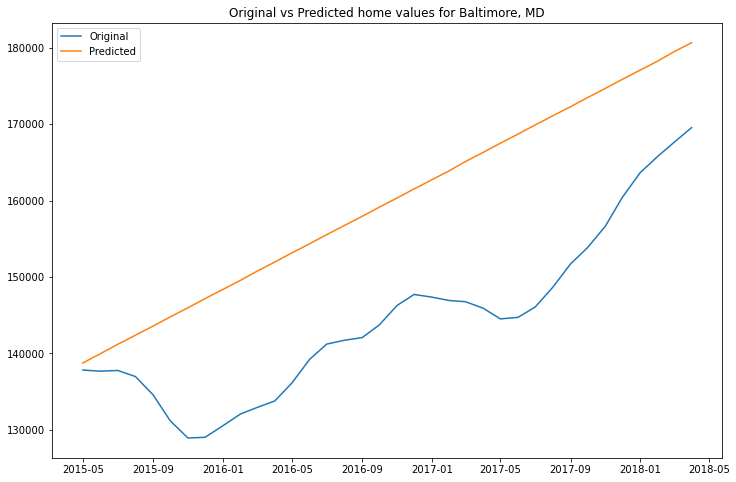

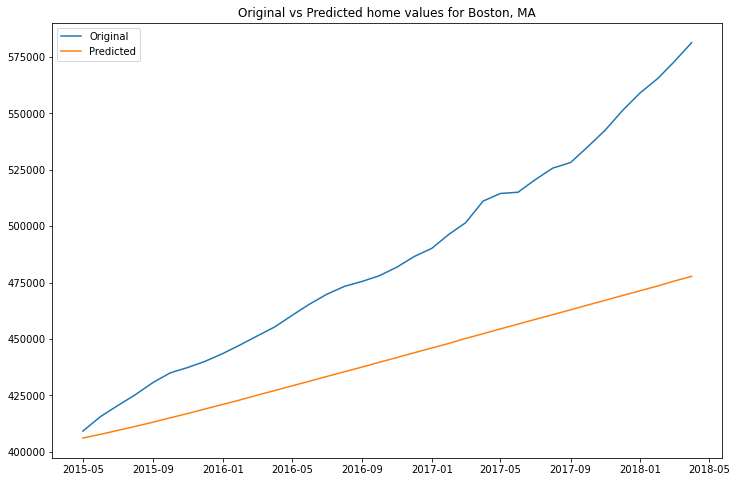

In [73]:
# differencing helped, try out the moving average 
rmse_list = []
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 1,2,2)
    city_model.plot(test)
    rmse_list.append(city_model.rmse_)

In [74]:
# even more improvement
np.mean(rmse_list)

35695.0503309849

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  229
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1858.448
Date:                Fri, 13 May 2022   AIC                           3726.897
Time:                        12:02:59   BIC                           3744.021
Sample:                    04-01-1996   HQIC                          3733.807
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3824      0.484      2.856      0.004       0.434       2.331
ar.L2         -0.4106      0.461     -0.891      0.373      -1.314       0.493
ma.L1         -1.3393      0.478     -2.803      0.0

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  229
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -2127.546
Date:                Fri, 13 May 2022   AIC                           4265.093
Time:                        12:03:00   BIC                           4282.217
Sample:                    04-01-1996   HQIC                          4272.003
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3577      2.174      0.165      0.869      -3.904       4.619
ar.L2          0.4114      1.858      0.221      0.825      -3.231       4.054
ma.L1         -0.4960      2.163     -0.229      0.8

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  229
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1951.922
Date:                Fri, 13 May 2022   AIC                           3913.844
Time:                        12:03:02   BIC                           3930.969
Sample:                    04-01-1996   HQIC                          3920.754
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7327      1.698      1.020      0.308      -1.596       5.061
ar.L2         -0.7333      1.353     -0.542      0.588      -3.384       1.918
ma.L1         -1.7653      1.697     -1.040      0.2

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  229
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -2075.851
Date:                Fri, 13 May 2022   AIC                           4161.701
Time:                        12:03:02   BIC                           4178.826
Sample:                    04-01-1996   HQIC                          4168.612
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0770      8.198      0.009      0.993     -15.991      16.145
ar.L2          0.6546      6.883      0.095      0.924     -12.836      14.146
ma.L1         -0.1399      8.197     -0.017      0.9

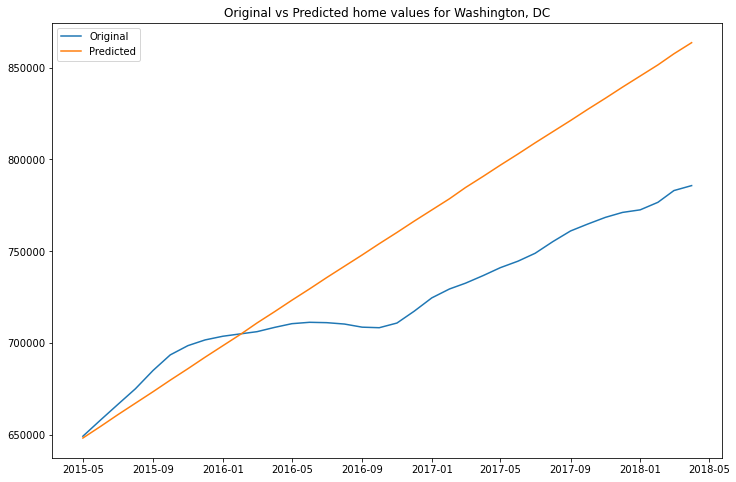

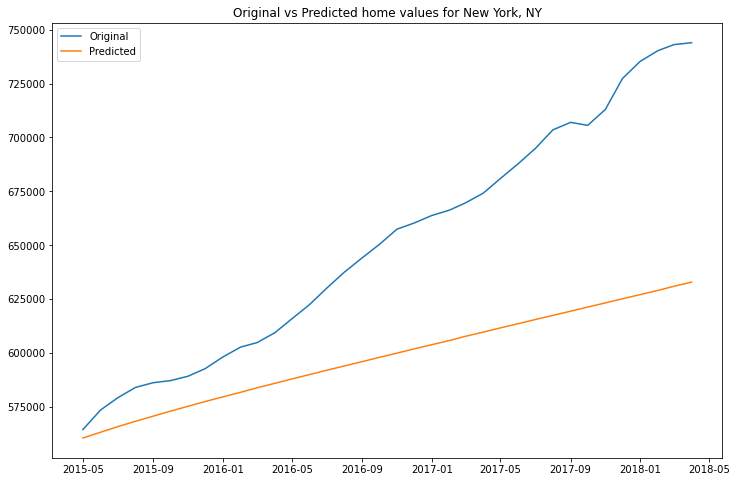

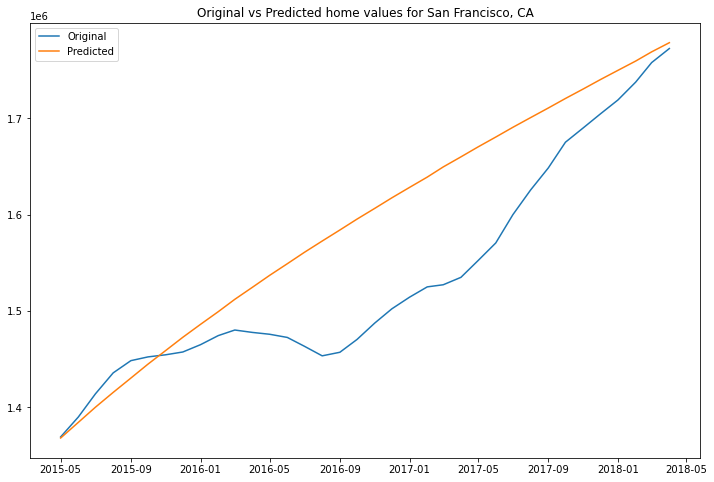

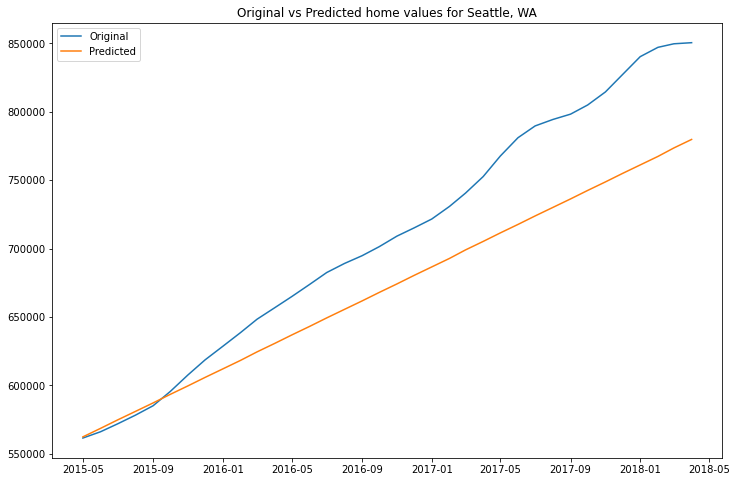

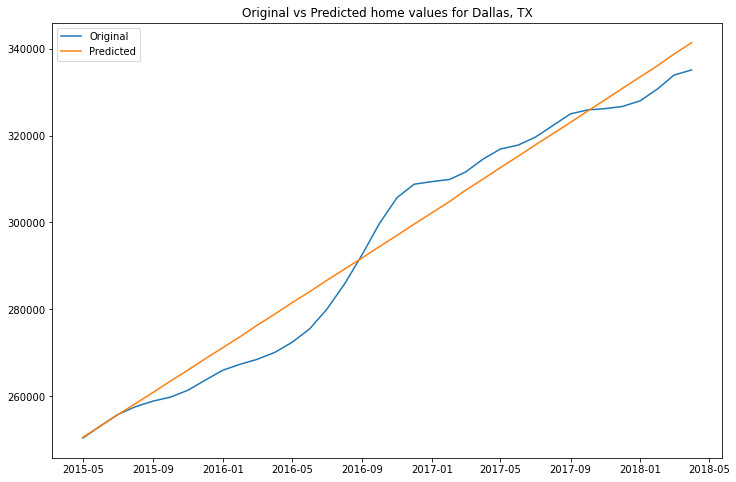

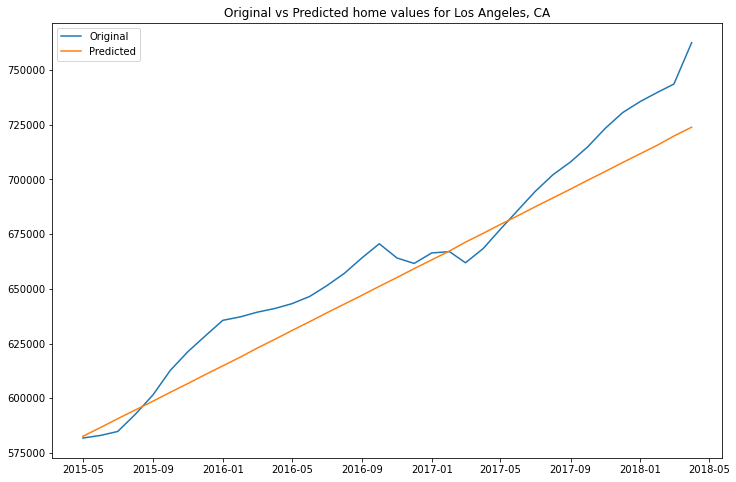

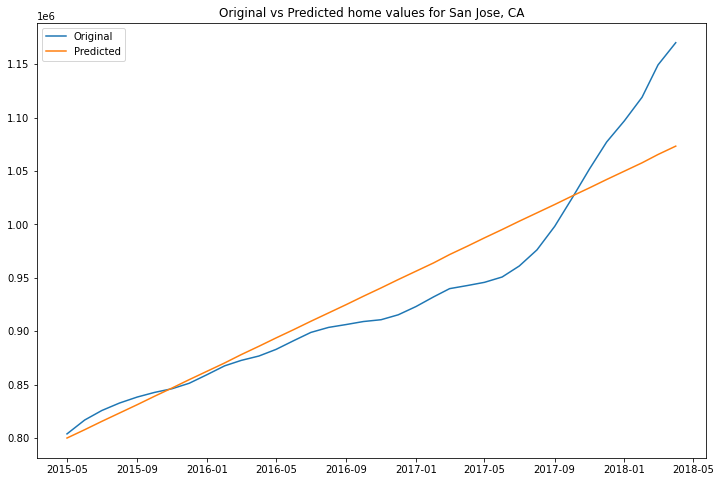

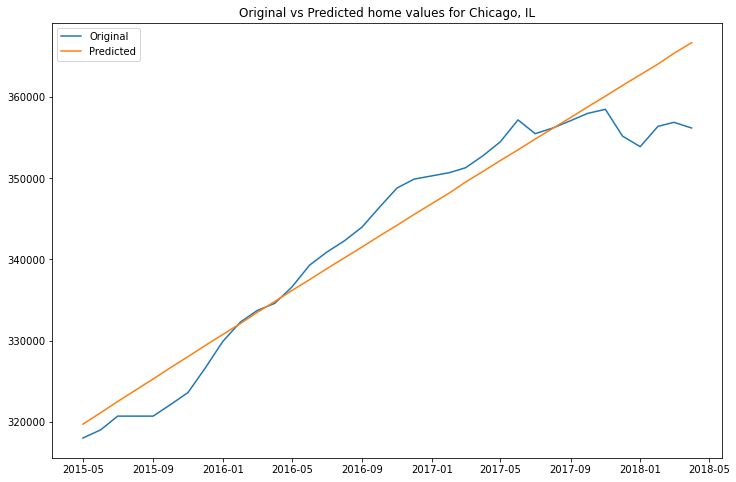

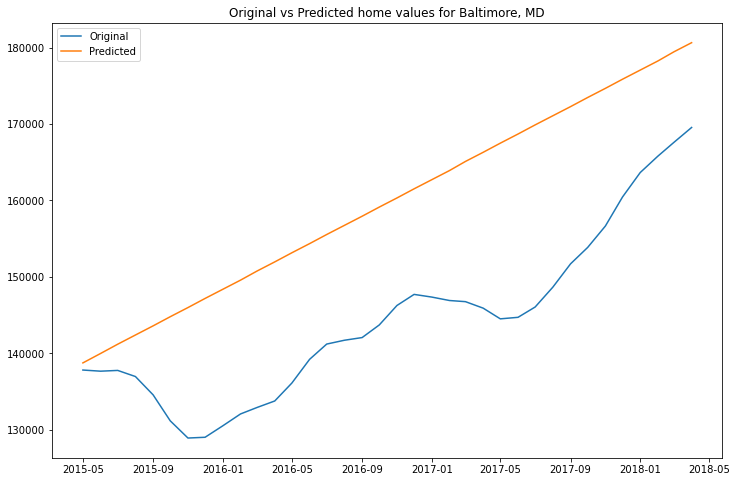

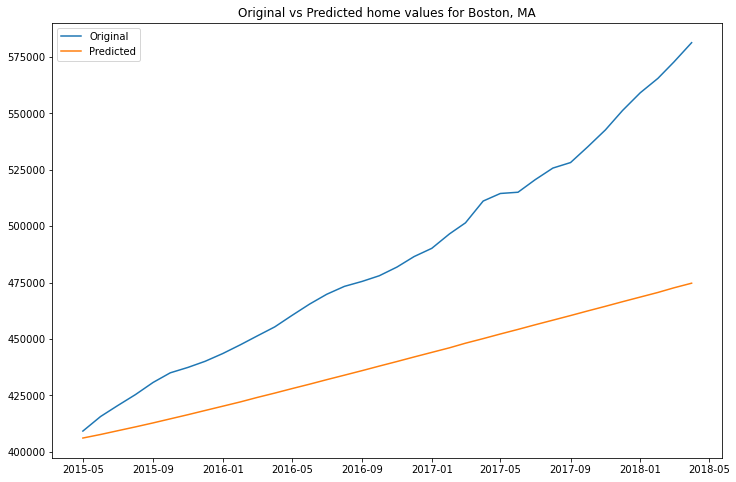

In [75]:
# see how adding in Autoregression helps
rmse_list = []
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 2,2,2)
    city_model.plot(test)
    rmse_list.append(city_model.rmse_)

In [76]:
# moving in the wrong direction
np.mean(rmse_list)

35666.75670104228

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  229
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -1857.847
Date:                Fri, 13 May 2022   AIC                           3725.693
Time:                        12:03:09   BIC                           3742.818
Sample:                    04-01-1996   HQIC                          3732.603
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9714      0.023     41.616      0.000       0.926       1.017
ma.L1         -0.9290      0.022    -41.750      0.000      -0.973      -0.885
ma.L2         -0.0345      0.017     -2.056      0.0

                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  229
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -2075.658
Date:                Fri, 13 May 2022   AIC                           4161.315
Time:                        12:03:11   BIC                           4178.440
Sample:                    04-01-1996   HQIC                          4168.225
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7735      0.205      3.774      0.000       0.372       1.175
ma.L1         -0.8365      0.209     -3.997      0.000      -1.247      -0.426
ma.L2         -0.0073      0.029     -0.253      0.8

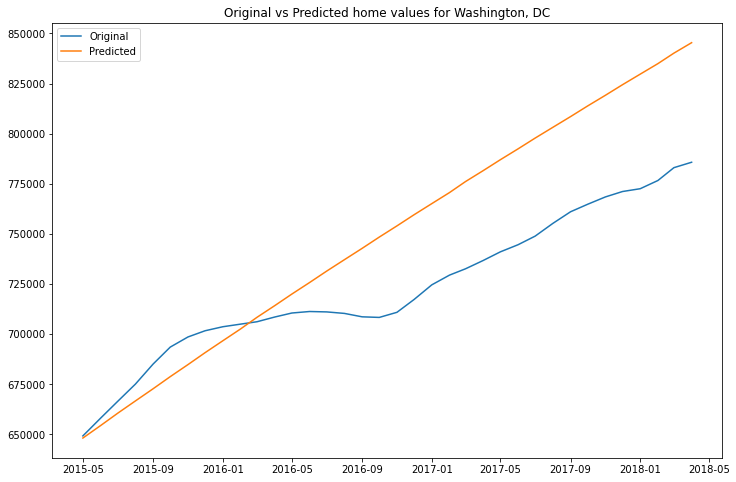

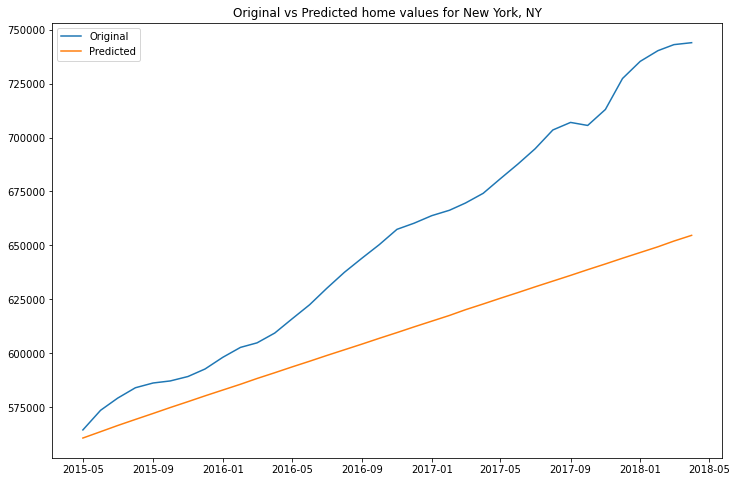

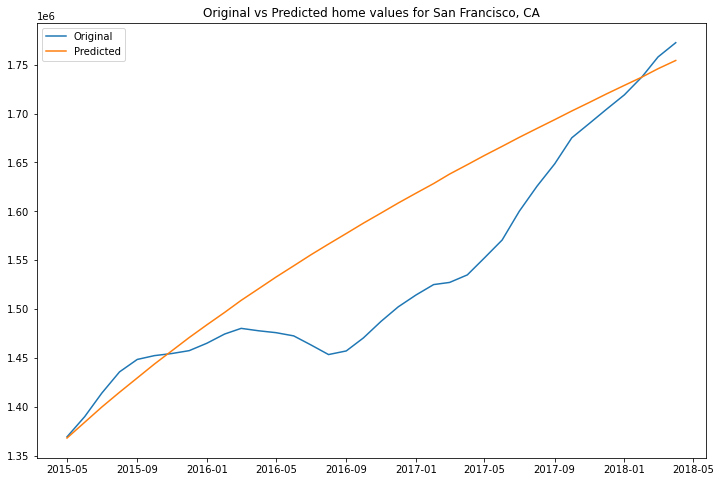

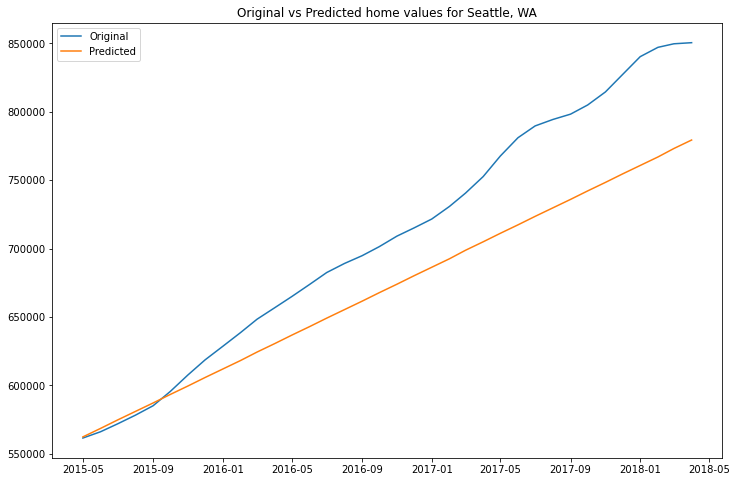

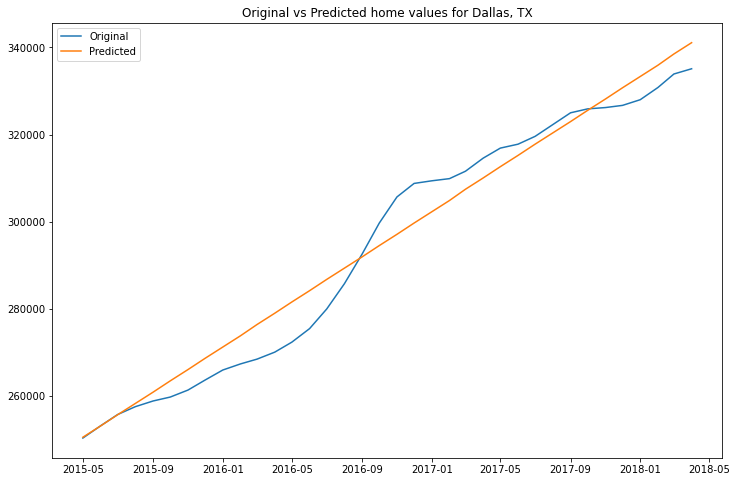

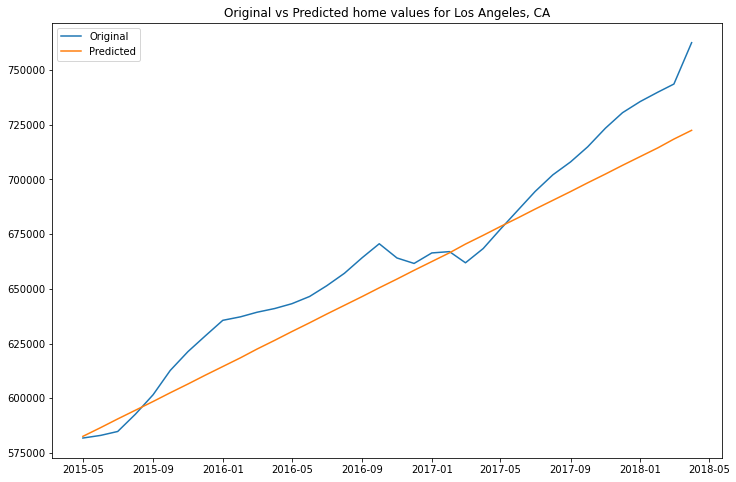

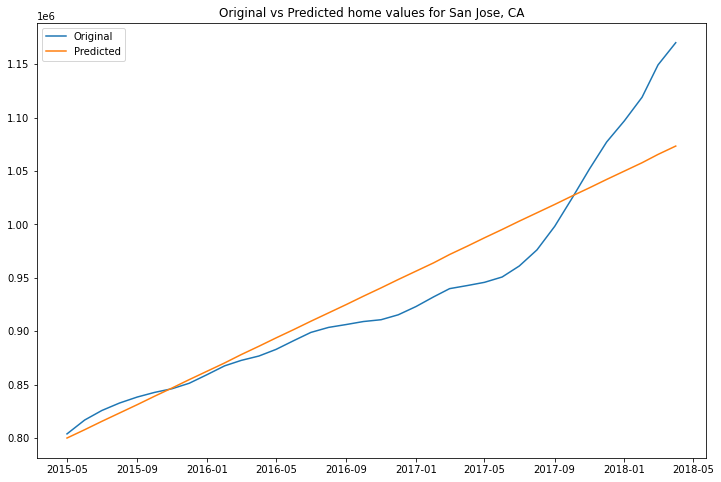

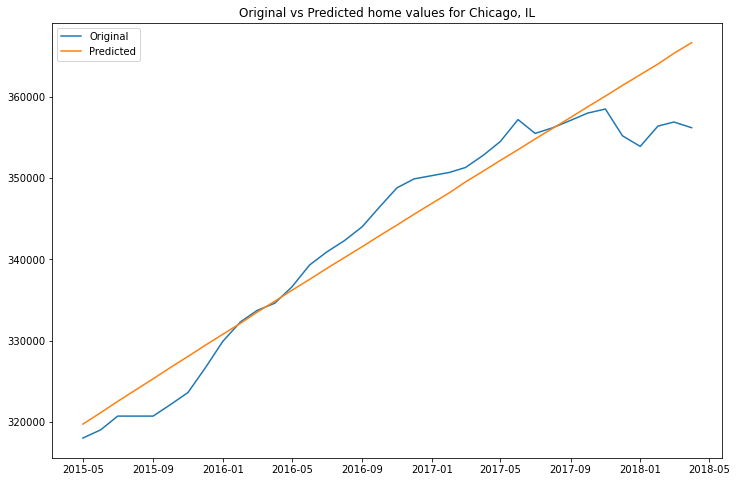

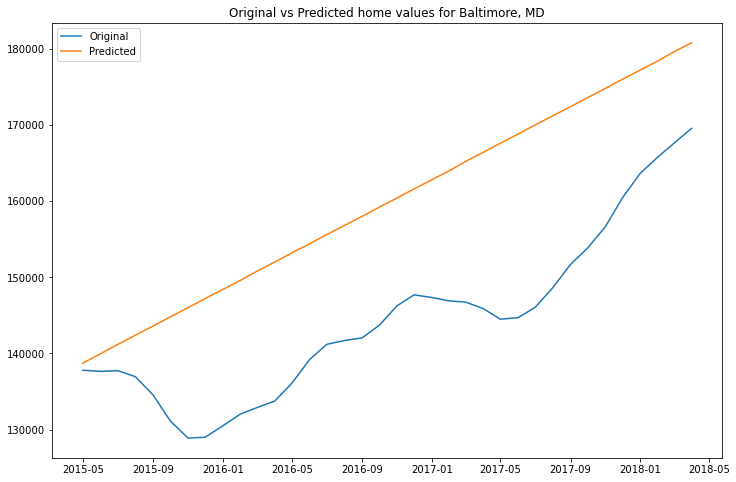

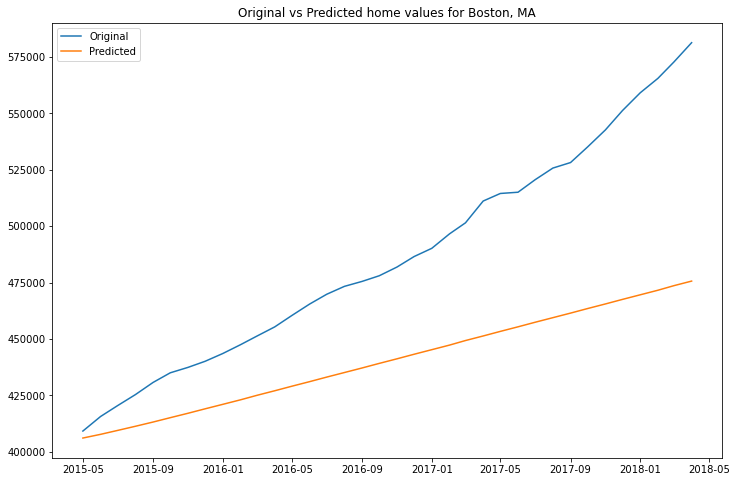

In [77]:
# perhaps giving another moving average variable
rmse_list = []
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 1,2,3)
    city_model.plot(test)
    rmse_list.append(city_model.rmse_)

In [78]:
# the best one yet
np.mean(rmse_list)

32866.76222413008

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  229
Model:                 ARIMA(1, 2, 4)   Log Likelihood               -1857.689
Date:                Fri, 13 May 2022   AIC                           3727.379
Time:                        12:03:17   BIC                           3747.928
Sample:                    04-01-1996   HQIC                          3735.671
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9620      0.038     25.499      0.000       0.888       1.036
ma.L1         -0.9191      0.038    -24.057      0.000      -0.994      -0.844
ma.L2         -0.0343      0.018     -1.881      0.0

                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  229
Model:                 ARIMA(1, 2, 4)   Log Likelihood               -1955.773
Date:                Fri, 13 May 2022   AIC                           3923.547
Time:                        12:03:20   BIC                           3944.097
Sample:                    04-01-1996   HQIC                          3931.839
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2928     18.771     -0.016      0.988     -37.084      36.498
ma.L1          0.2580     18.771      0.014      0.989     -36.532      37.048
ma.L2         -0.0280      0.652     -0.043      0.9

                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  229
Model:                 ARIMA(1, 2, 4)   Log Likelihood               -1746.299
Date:                Fri, 13 May 2022   AIC                           3504.598
Time:                        12:03:22   BIC                           3525.148
Sample:                    04-01-1996   HQIC                          3512.890
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4160      1.301      0.320      0.749      -2.135       2.967
ma.L1         -0.3909      1.298     -0.301      0.763      -2.934       2.152
ma.L2         -0.1814      0.042     -4.366      0.0

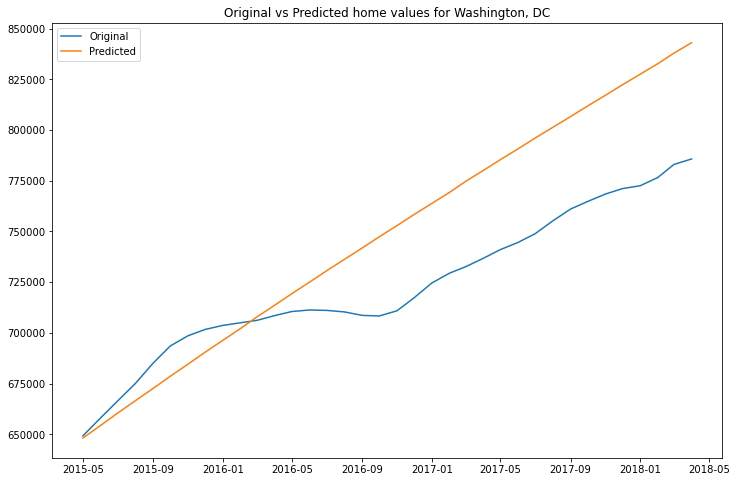

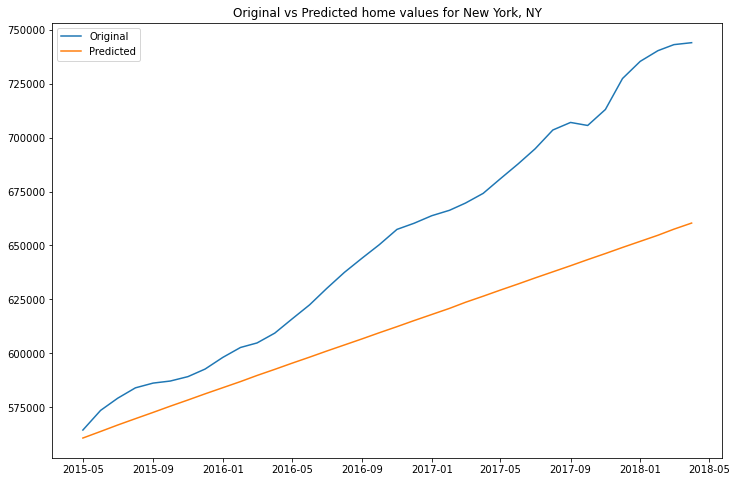

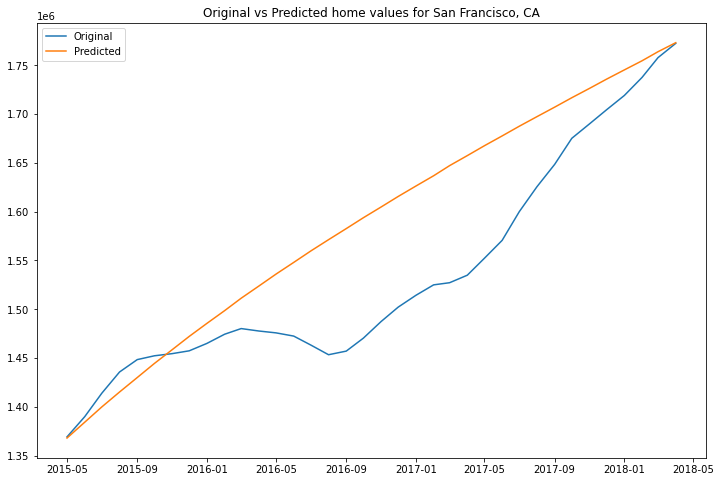

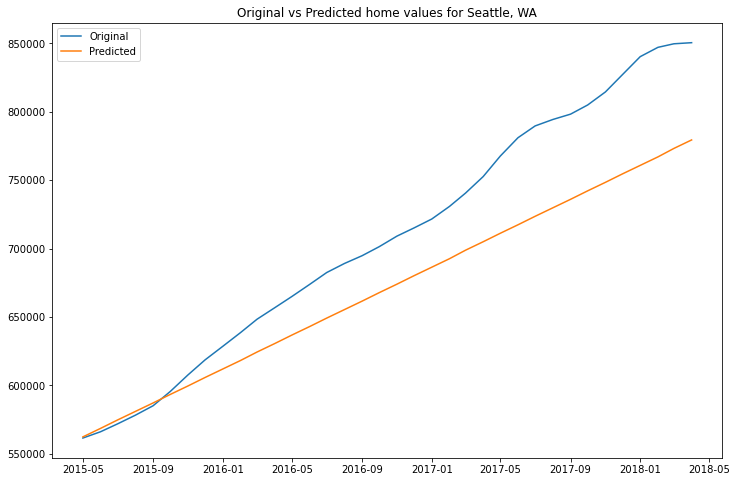

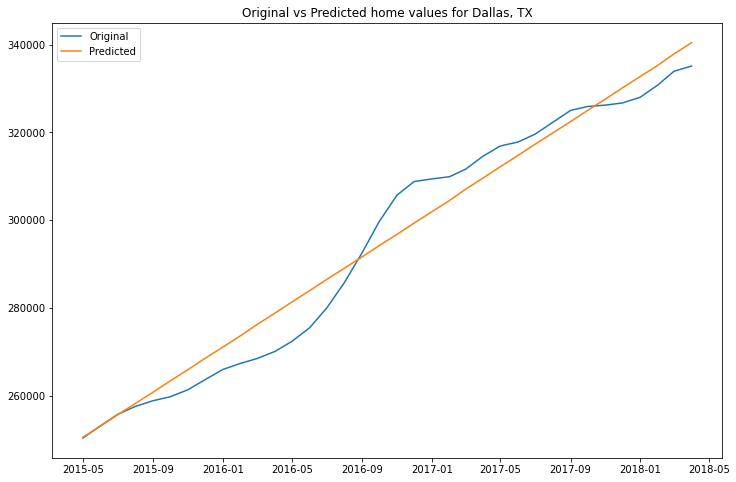

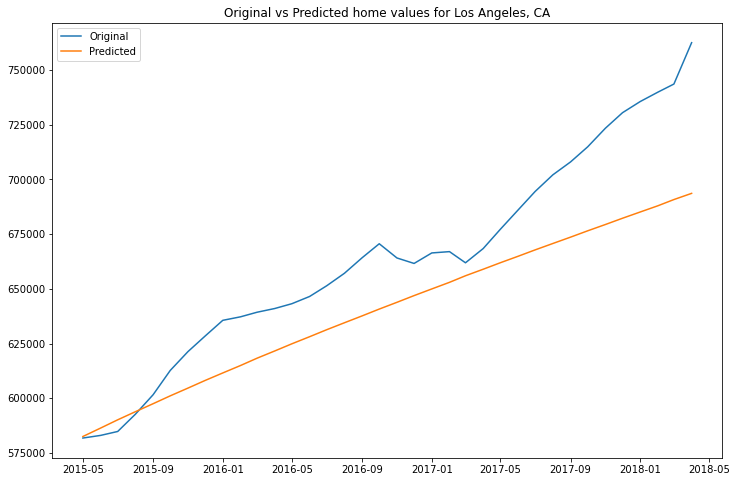

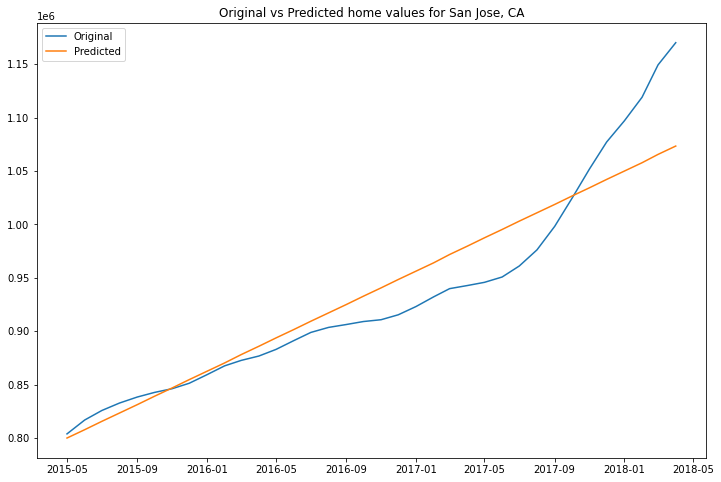

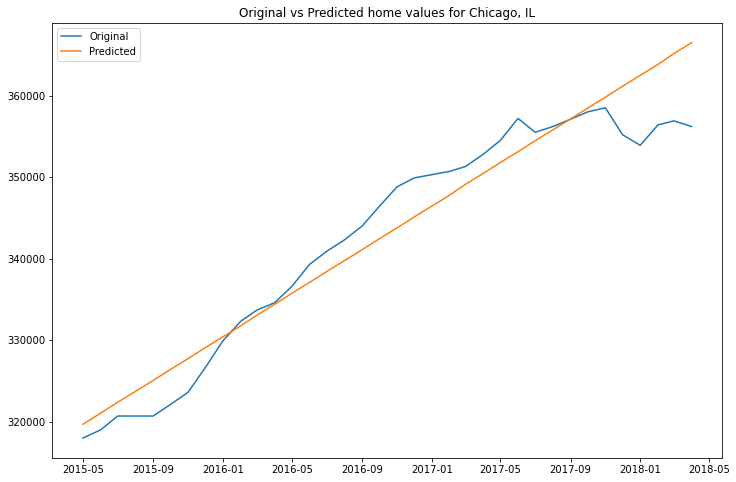

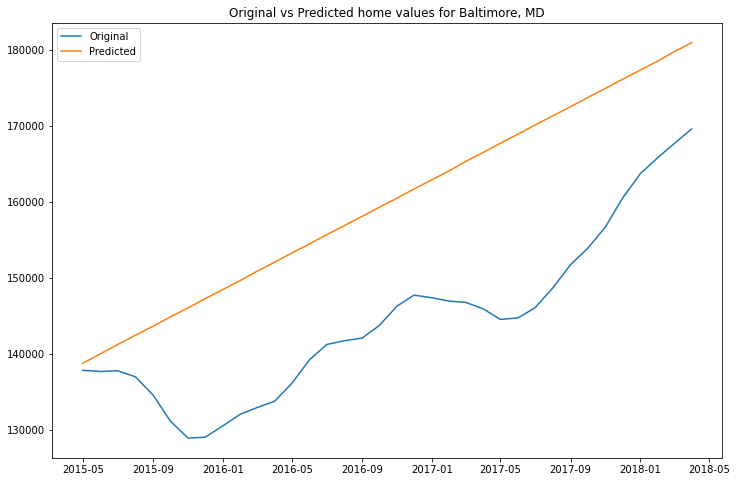

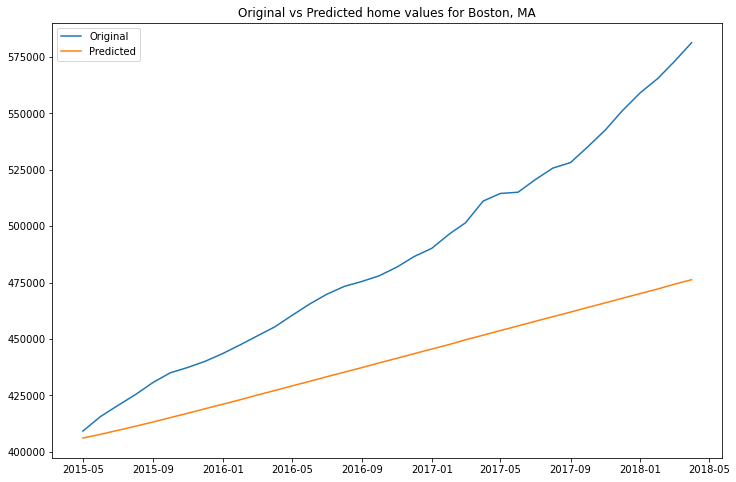

In [79]:
#4 useful graphs
rmse_list = []
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 1,2,4)
    city_model.plot(test)
    rmse_list.append(city_model.rmse_)

In [80]:
# moving in the wrong direction again
np.mean(rmse_list)

34251.127387492874

In [81]:
# try a different balance
#rmse_list = []
#for city in city_list:
#    city_model = arima_mod(city)
#    city_model.model(train, test, 3,1,3)
#    city_model.plot(test)
#    rmse_list.append(city_model.rmse_)

In [82]:
# couldn't converge on an answer for the fourth city 
# np.mean(rmse_list)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  229
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -2173.633
Date:                Fri, 13 May 2022   AIC                           4361.265
Time:                        12:06:15   BIC                           4385.270
Sample:                    04-01-1996   HQIC                          4370.951
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0876      0.950      2.197      0.028       0.225       3.950
ar.L2         -1.0685      1.041     -1.027      0.305      -3.108       0.971
ar.L3         -0.1373      0.018     -7.572      0.0

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  229
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -2228.439
Date:                Fri, 13 May 2022   AIC                           4470.877
Time:                        12:06:16   BIC                           4494.883
Sample:                    04-01-1996   HQIC                          4480.563
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1412      1.186      0.119      0.905      -2.183       2.465
ar.L2          0.8106      1.176      0.690      0.490      -1.493       3.115
ar.L3         -0.0264      0.028     -0.950      0.3

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:      San Francisco, CA   No. Observations:                  229
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -2082.341
Date:                Fri, 13 May 2022   AIC                           4178.682
Time:                        12:06:17   BIC                           4202.688
Sample:                    04-01-1996   HQIC                          4188.368
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4416   3.39e-08   4.25e+07      0.000       1.442       1.442
ar.L2         -0.4678   1.35e-08  -3.45e+07      0.000      -0.468      -0.468
ar.L3          0.6108   6.67e-09   9.15e+07      0.0

LinAlgError: LU decomposition error.

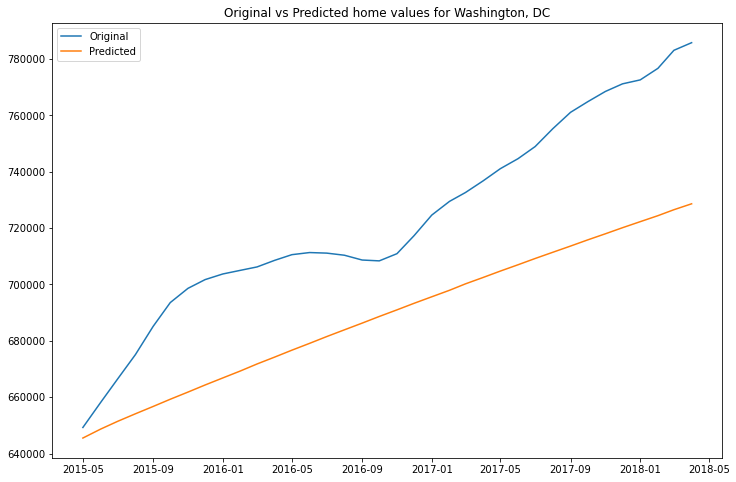

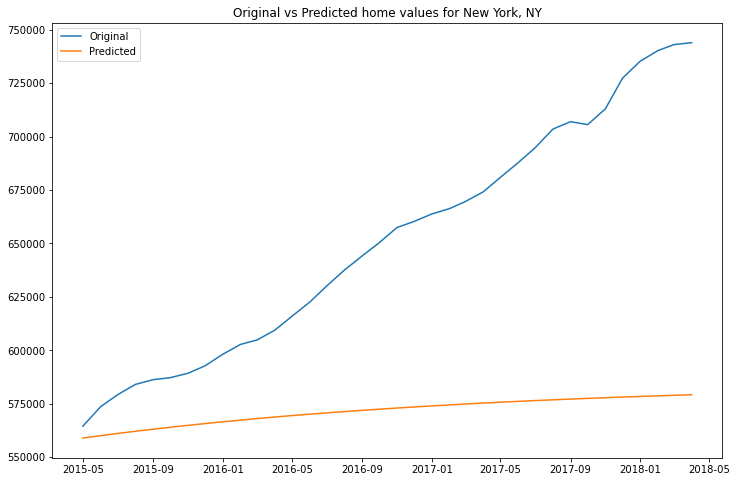

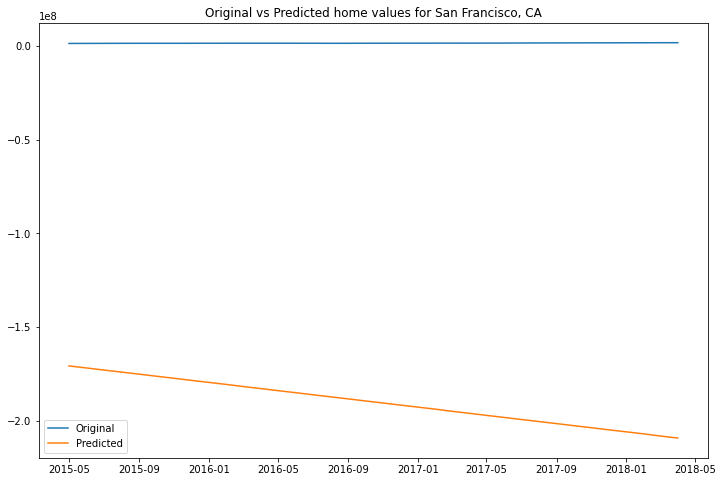

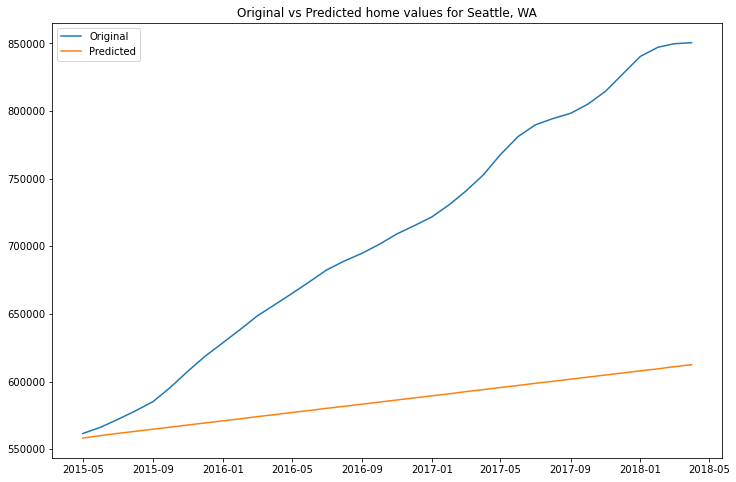

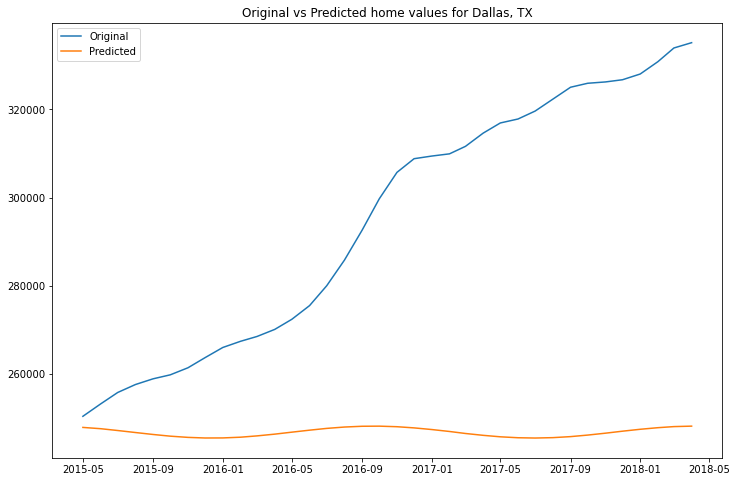

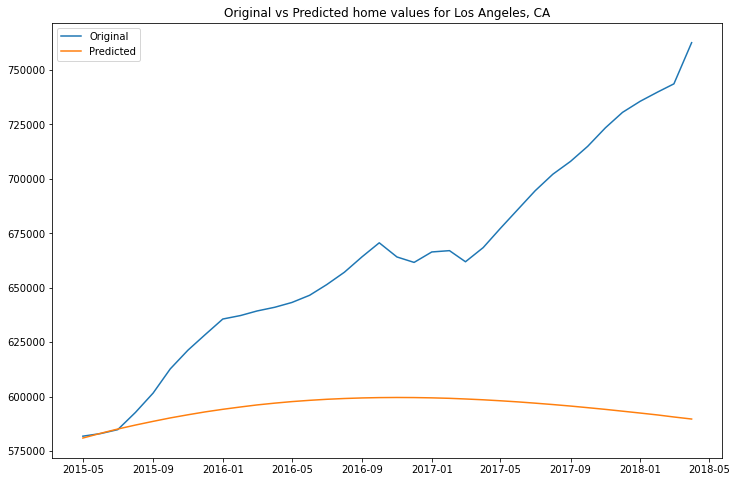

In [90]:
# another try for a different p parameter
# re-run the cell in case of an error. There might be some randomness in determining the optimal coefficients.
rmse_list = []
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 4,1,2)
    city_model.plot(test)
    rmse_list.append(city_model.rmse_)

In [85]:
# really rough set of graphs
np.mean(rmse_list)

32031328.727358248

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  229
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2840.124
Date:                Fri, 13 May 2022   AIC                           5698.247
Time:                        12:04:12   BIC                           5729.111
Sample:                    04-01-1996   HQIC                          5710.700
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0471      0.011     -4.286      0.000      -0.069      -0.026
ar.L2          1.7325      0.012    149.072      0.000       1.710       1.755
ar.L3          0.1835      0.011     16.996      0.0

                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  229
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1945.753
Date:                Fri, 13 May 2022   AIC                           3909.507
Time:                        12:04:16   BIC                           3940.371
Sample:                    04-01-1996   HQIC                          3921.960
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1878      3.220      0.369      0.712      -5.123       7.499
ar.L2          0.0765      6.826      0.011      0.991     -13.302      13.455
ar.L3         -0.6533      5.837     -0.112      0.9

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  229
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2322.046
Date:                Fri, 13 May 2022   AIC                           4662.093
Time:                        12:04:17   BIC                           4692.957
Sample:                    04-01-1996   HQIC                          4674.545
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7409      0.168      4.418      0.000       0.412       1.070
ar.L2          1.0056      0.248      4.049      0.000       0.519       1.492
ar.L3         -0.6974      0.172     -4.053      0.0

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  229
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2319.835
Date:                Fri, 13 May 2022   AIC                           4657.670
Time:                        12:04:20   BIC                           4688.534
Sample:                    04-01-1996   HQIC                          4670.122
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2791      1.590     -0.176      0.861      -3.395       2.837
ar.L2          1.1119      0.635      1.752      0.080      -0.132       2.356
ar.L3          0.3097      1.341      0.231      0.8

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  229
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2105.997
Date:                Fri, 13 May 2022   AIC                           4229.995
Time:                        12:04:23   BIC                           4260.859
Sample:                    04-01-1996   HQIC                          4242.448
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4132      0.330      4.282      0.000       0.766       2.060
ar.L2          0.5267      0.610      0.863      0.388      -0.669       1.723
ar.L3         -1.4139      0.566     -2.496      0.0

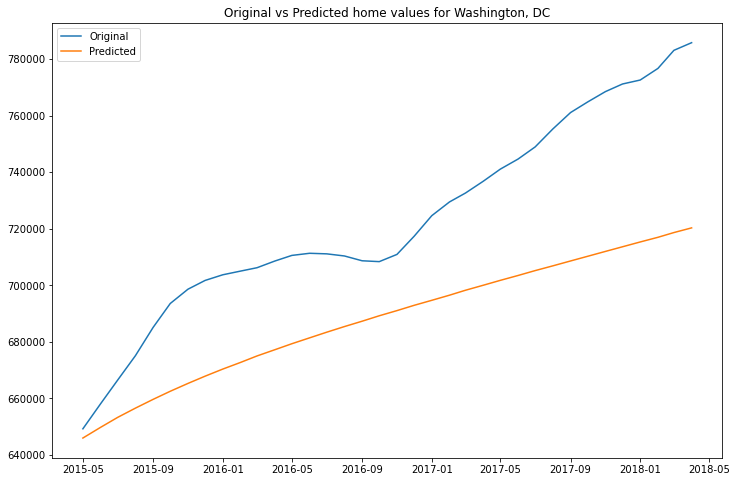

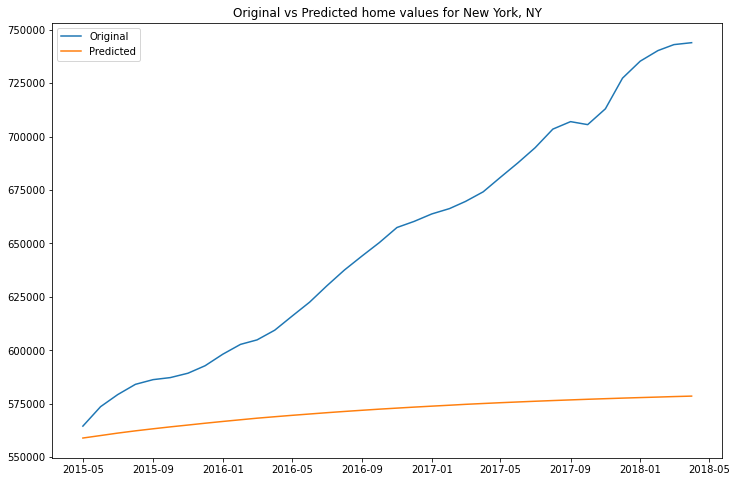

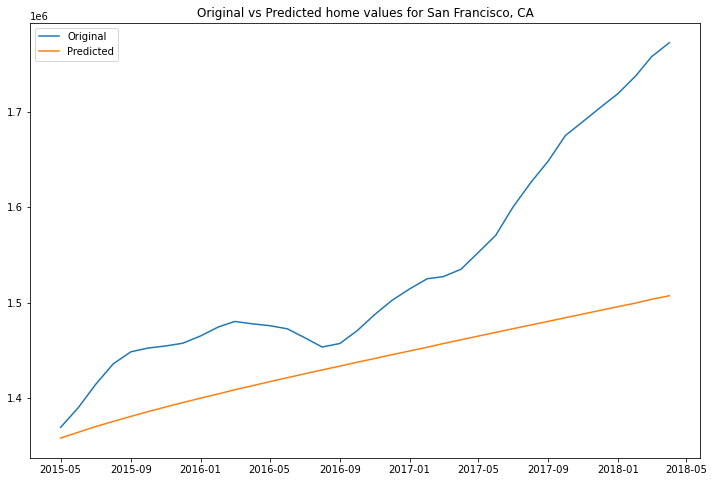

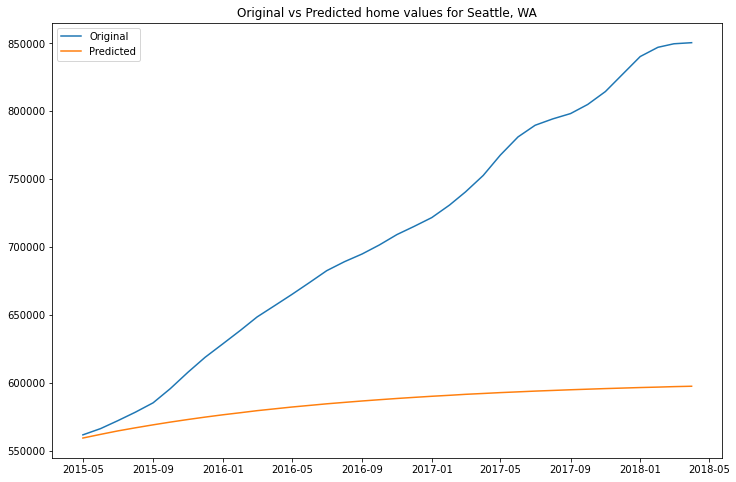

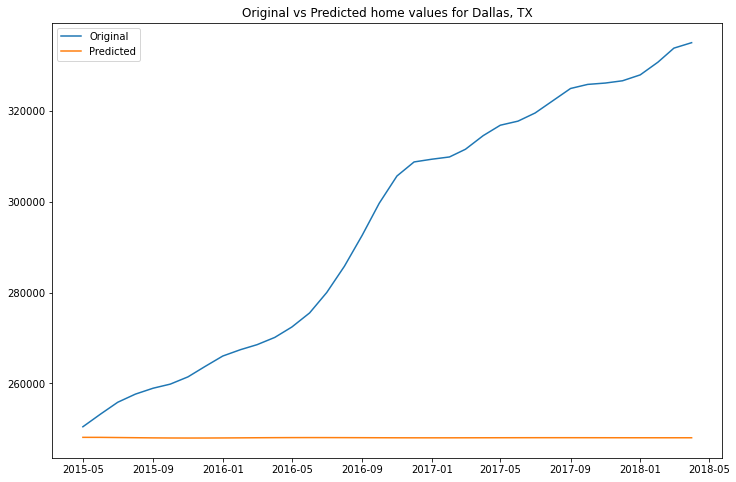

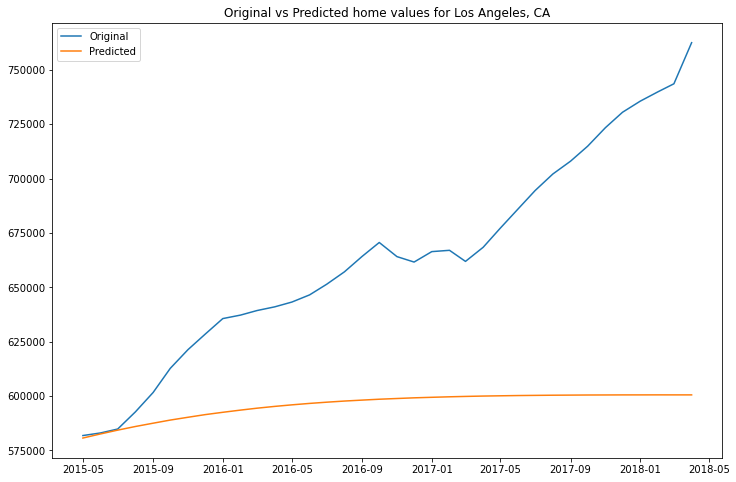

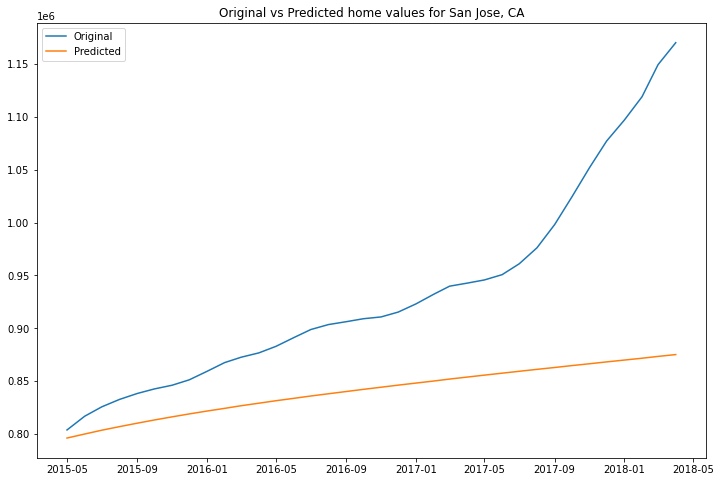

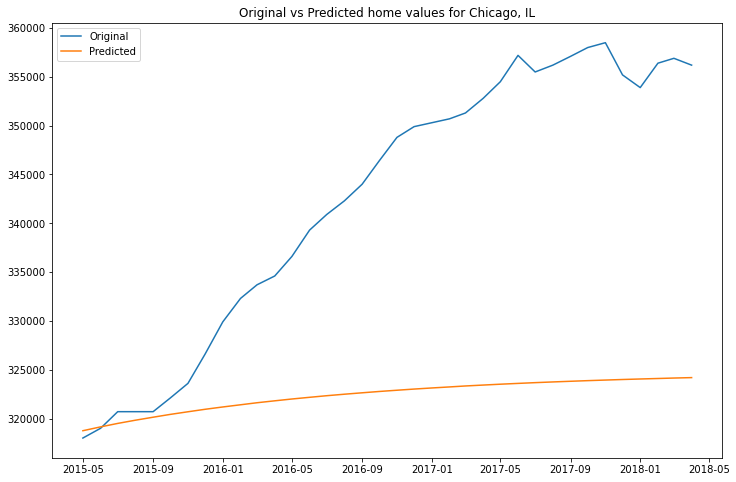

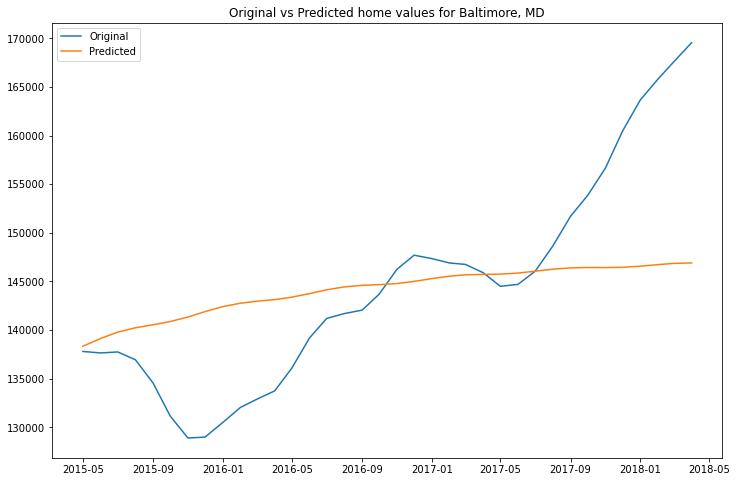

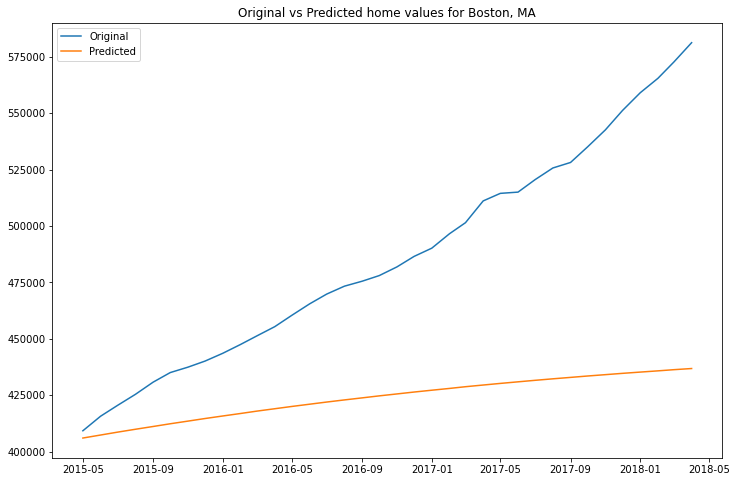

In [86]:
# try and give the moving average some more weight
rmse_list = []
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 4,1,4)
    city_model.plot(test)
    rmse_list.append(city_model.rmse_)

In [91]:
# still rough, don't know if much improvement can be made from 1,2,3 for p,d,q
np.mean(rmse_list)

32031328.727358248

#### Visualization for Model Performance

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  229
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -1857.847
Date:                Fri, 13 May 2022   AIC                           3725.693
Time:                        12:06:34   BIC                           3742.818
Sample:                    04-01-1996   HQIC                          3732.603
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9714      0.023     41.616      0.000       0.926       1.017
ma.L1         -0.9290      0.022    -41.750      0.000      -0.973      -0.885
ma.L2         -0.0345      0.017     -2.056      0.0

                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  229
Model:                 ARIMA(1, 2, 3)   Log Likelihood               -2075.658
Date:                Fri, 13 May 2022   AIC                           4161.315
Time:                        12:06:36   BIC                           4178.440
Sample:                    04-01-1996   HQIC                          4168.225
                         - 04-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7735      0.205      3.774      0.000       0.372       1.175
ma.L1         -0.8365      0.209     -3.997      0.000      -1.247      -0.426
ma.L2         -0.0073      0.029     -0.253      0.8

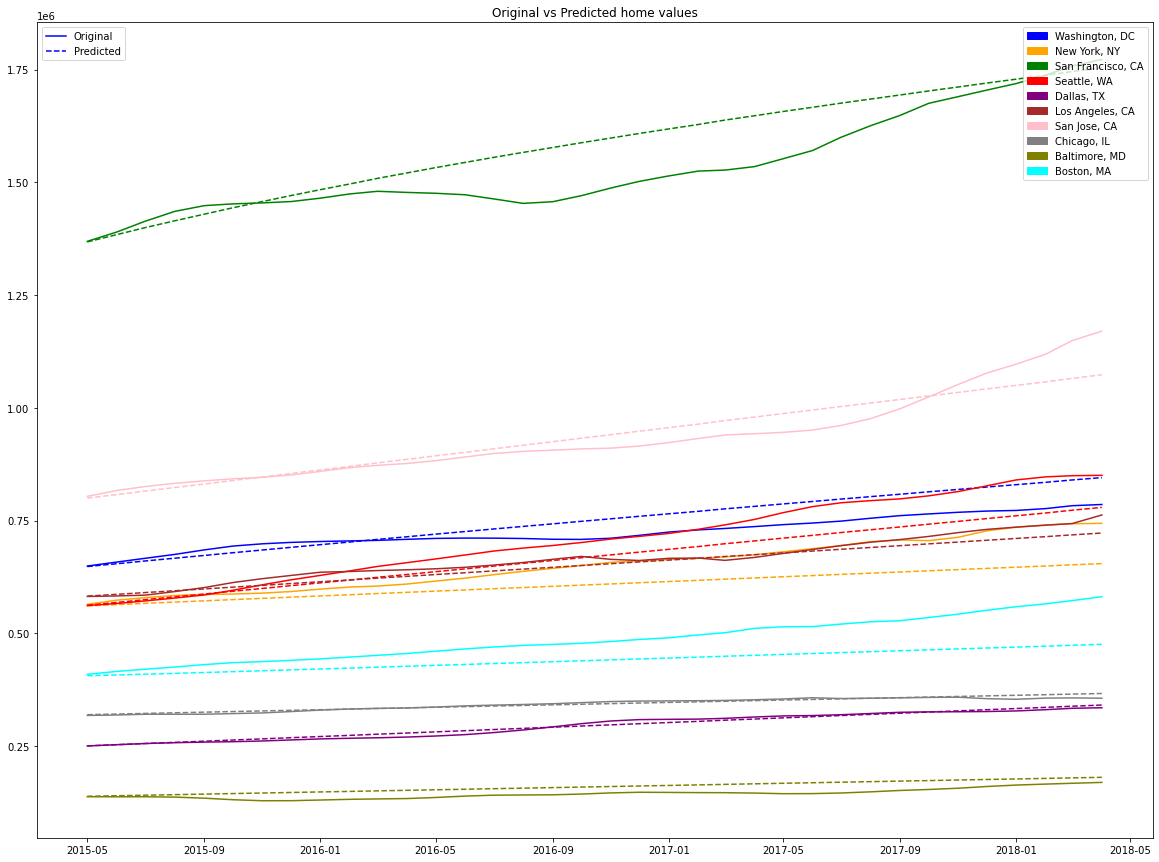

In [92]:
color_list=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
fig, ax = plt.subplots(figsize = (20,15)) 
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 1,2,3)
    ax.plot(test[city], color=color_list[city_list.index(city)])
    ax.plot(city_model.y_hat_test_, linestyle='--', color=color_list[city_list.index(city)])

leg = plt.legend(['Original', 'Predicted'], loc=2)
ax.add_artist(leg)

patch_list=[]
for color,city in zip(color_list,city_list):
    patch = mpatches.Patch(color=color, label=city)
    patch_list.append(patch)
plt.legend(handles=patch_list, loc=1)



ax.set_title('Original vs Predicted home values')

fig.savefig('figures/Original vs Predicted.jpeg', dpi=500)

### Forcasting home price with best model

In [94]:
#We created an empty dictionary for our predictions 
predictions_dict = {}

#We are running a for-loop where we add the forecast to the dictionary for every city
for city in city_list: 
    forecast_mod = ARIMA(melted_df[city], order = [1,2,3]).fit()
    predictions_dict[city] = forecast_mod.forecast(steps=36)

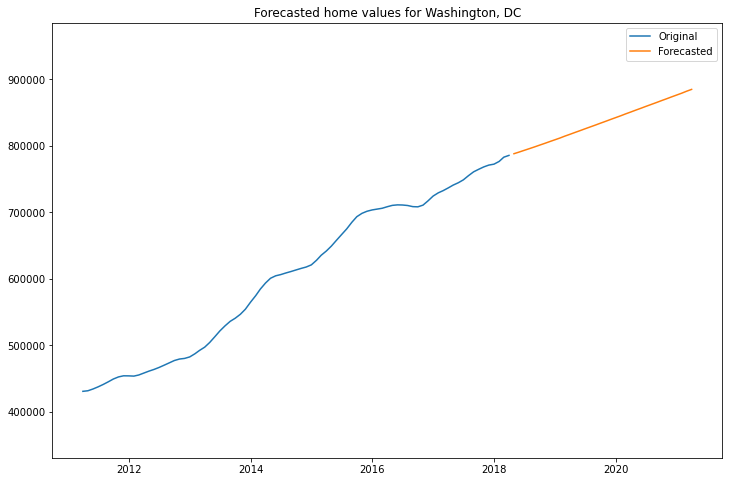

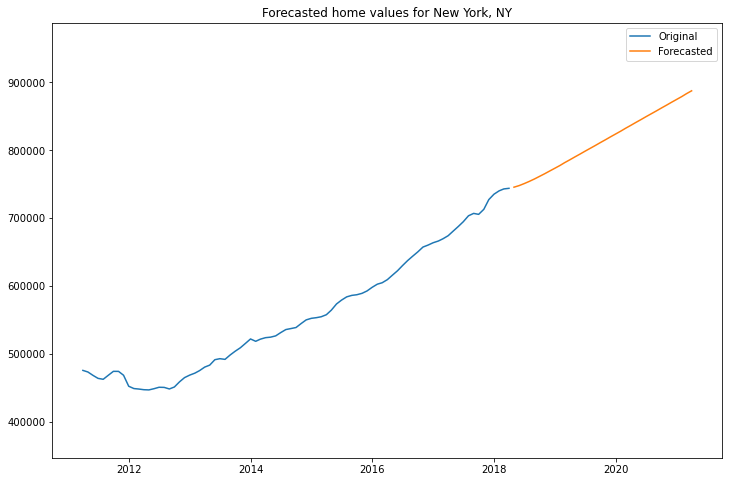

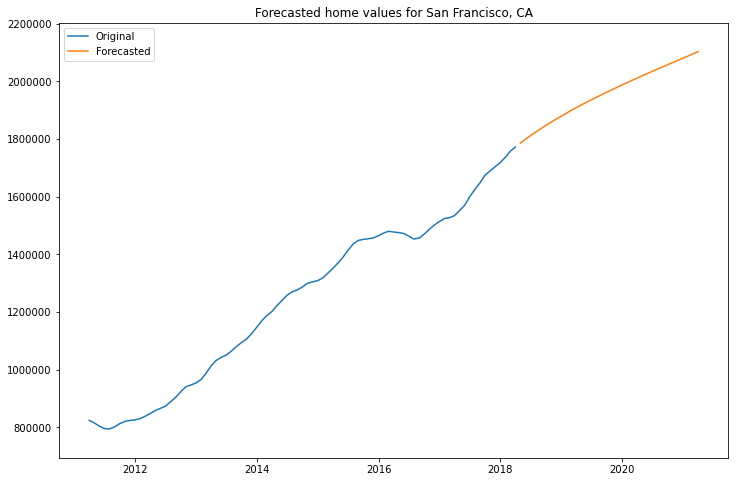

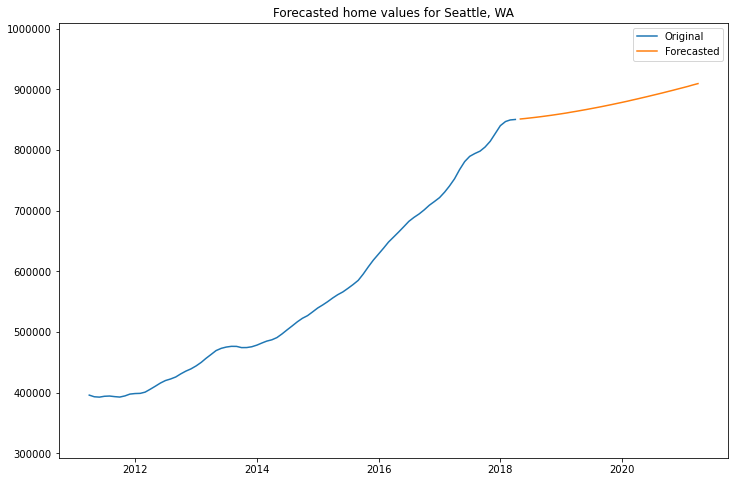

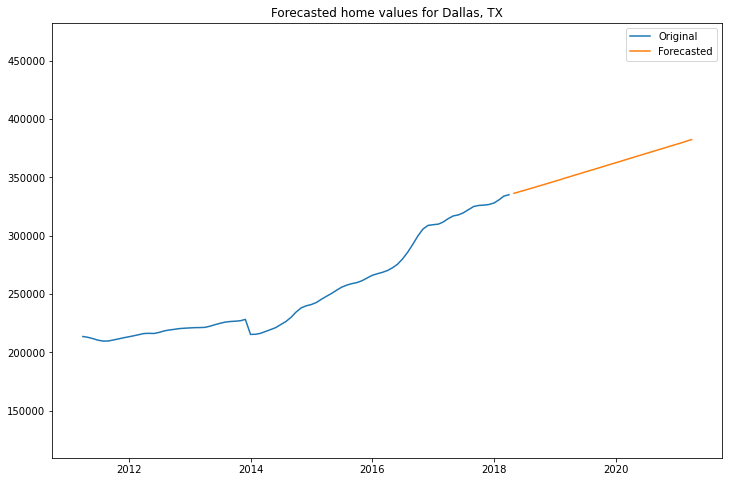

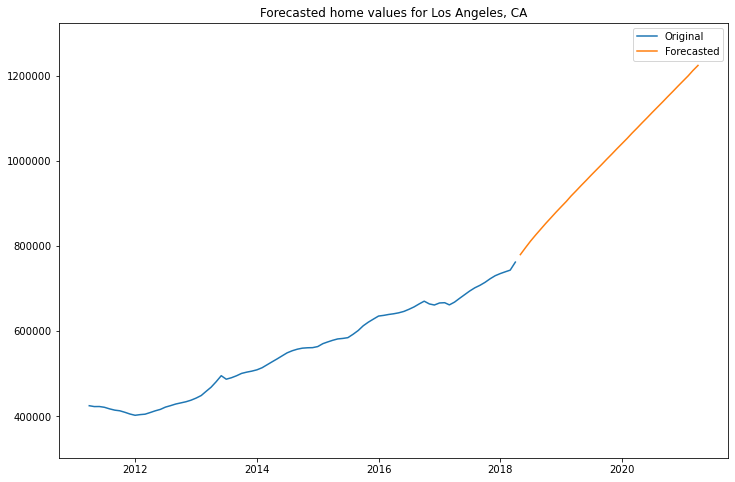

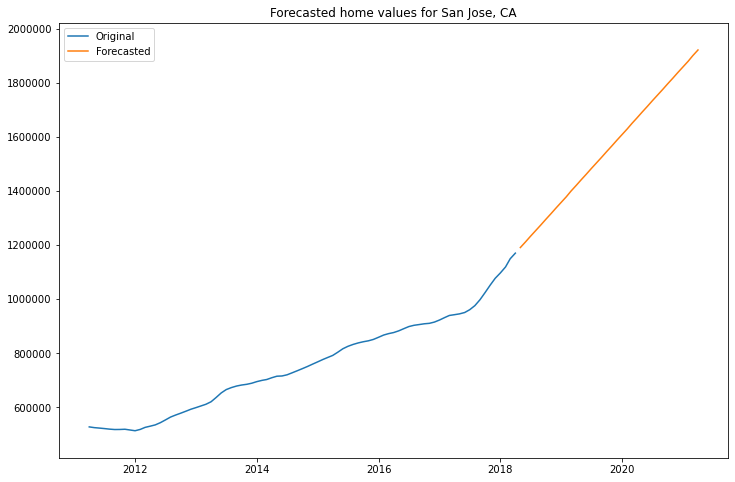

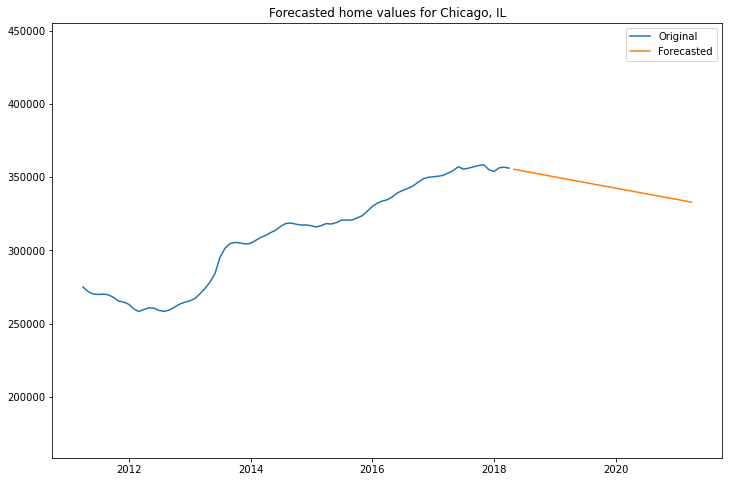

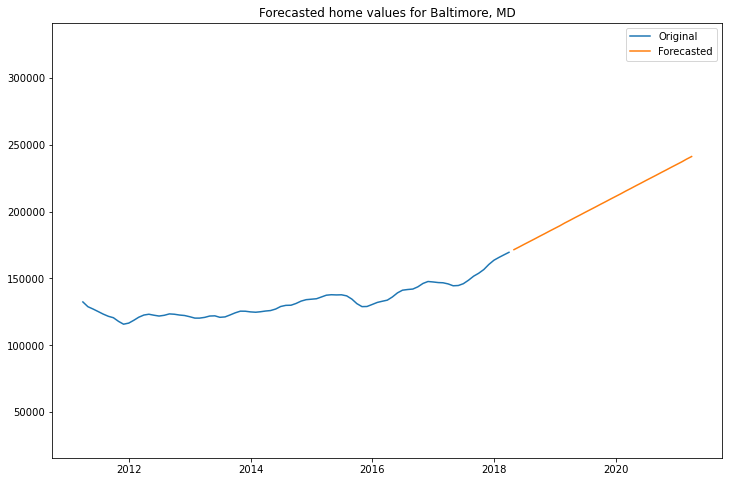

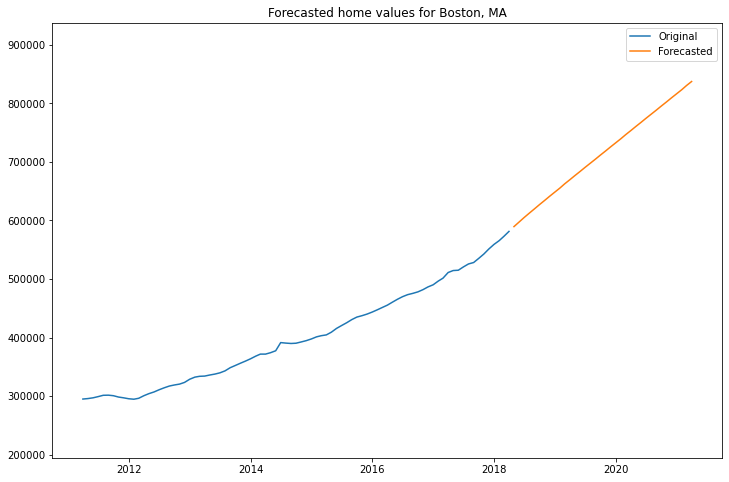

In [96]:
#We made a for loop that graphs all of the predictions
for city, predictions in predictions_dict.items():
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(melted_df[180:][city])
    ax.plot(predictions)
    ax.legend(['Original', 'Forecasted'])
    ax.set_title(f'Forecasted home values for {city}')
    ax.ticklabel_format(axis='y',style='plain')
    ax.set_ylim([min(melted_df[180:][city]-100000),max(predictions)+100000])
    plt.show()


In [97]:
forcasted_return = {}
for city in city_list:
    forcast_return = ((predictions_dict[city][-1]/melted_df[city][-1])*100) -100
    forcasted_return[city]=forcast_return
    
forcasted_return = pd.DataFrame.from_dict(forcasted_return, orient='index')
forcasted_return.reset_index(inplace=True)
forcasted_return.rename({0:'Percent Return in 3 years','index':'City'},inplace=True, axis=1)
forcasted_return

City  Percent Return in 3 years
0     Washington, DC                  12.635529
1       New York, NY                  19.307380
2  San Francisco, CA                  18.655403
3        Seattle, WA                   6.953193
4         Dallas, TX                  14.096486
5    Los Angeles, CA                  60.669809
6       San Jose, CA                  64.161839
7        Chicago, IL                  -6.531644
8      Baltimore, MD                  42.280752
9         Boston, MA                  44.026092

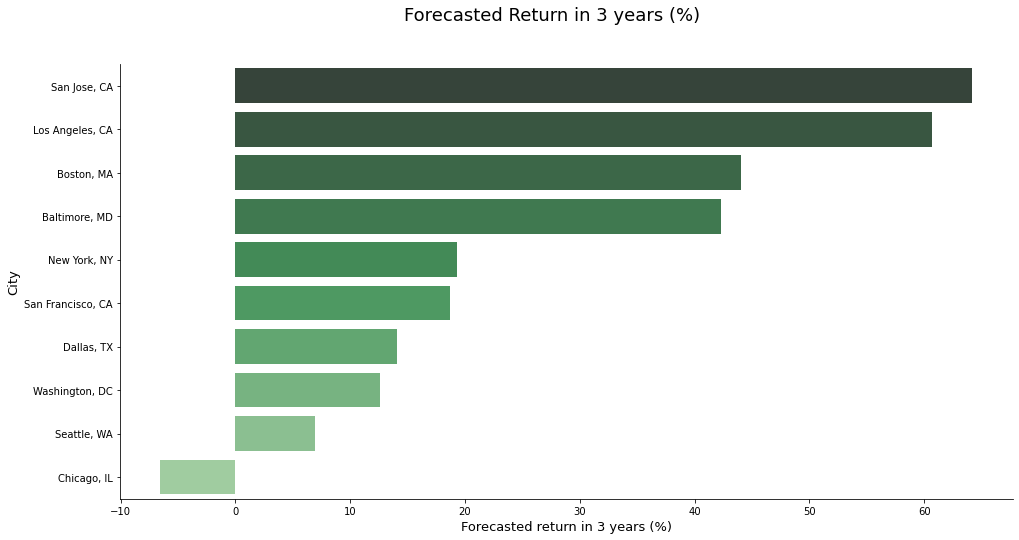

In [98]:
fig, ax = plt.subplots(figsize=(16,8))
forcasted_sort = forcasted_return.sort_values('Percent Return in 3 years',ascending = False)
# sns.set_palette("crest")

pal = sns.color_palette("Greens_d", len(forcasted_sort))
# rank = forcasted_sort.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sns.barplot(x='Percent Return in 3 years', y='City', data=forcasted_sort,palette=np.array(pal[::-1]))
sns.despine()
fig.suptitle("Forecasted Return in 3 years (%)", fontsize = 18)
ax.set_xlabel("Forecasted return in 3 years (%)", fontsize = 13)
ax.set_ylabel("City", fontsize = 13)
plt.savefig('figures/forecast_return.png', transparent=True,bbox_inches="tight", dpi=500)
plt.savefig('figures/forecast_return.jpeg', transparent=True,bbox_inches="tight", dpi=500)

# Conclusions

## Recommendations

The forecasts show the largest growth in San Jose, Los Angeles, Boston, Baltimore, and New York. We would suggest focusing on these markets. San Francisco was a close runner-up, but the market is much more expensive there. We would be unable to buy as much property there, and would be able to diversify much more in cities like Baltimore or Los Angeles. There is a good balance to the 5 cities we have suggested here that should hedge against itself. San Jose, Boston, and New York are well established cities with not a lot of buildable land left. Just owning real estate in these cities will ensure that values will give consistent returns. However, Baltimore and Los Angeles have more land that could give huge returns if invested in and renovated properly. The trick would be doing this in a manner that does not feel to be undermining the affordability, culture, or diversity of these neighborhoods as is often the case. These rennovations must not feel gaudy, but seemless and at home with the current residents. Another more ethically straightforward, but politically challenging idea is looking into building more dense housing in the suburbs with multiplexes or townhouses. These projects often run into obstacles, but as NIMBY culture becomes less popular and zoning reform progresses, new investment opportunities should arise.

## Next Steps

There are several steps that could be taken to give even more value if we had the funding. While our model performed quite well, it was evaluated on test data that was consistently a bull market. If the market was bear or particularly volatile, it is unlikely that the model would perform as well. This is particularly seen with the prediction for Chicago market. Because Chicago was in a short term slump in our most recent data points, this market shrinkage was projected to continue for the next three years. Designing a model that could differentiate volatility changes as opposed to structural market failures could allow for much better predictions.

Furthermore, our model only looked at factors endogenous to the time series data. While this is useful for understanding how real estate markets change over time, it does nothing to explain all the other factors that are driving changes in housing prices. If we had more data on factors relevant to housing prices, such as housing density, quality of infrastructure, and cultural engagement, then we could explain so much more of the variance that our model failed to explain. In particular, we could use more complex models like SARIMAX, or even a Long-short Term Memory Neural Network to catch on to patterns completely unexplored by our current model. 

Finally, since this data has been recorded, much has changed in the real estate market. COVID-19 made the real estate market come to an abrupt halt, only for the absurdly low interest rates to trigger one of the greatest housing market shortages in decades. And now, with the interest rates increasing once more, it seems that the housing market is starting to cool off once more. A simple ARIMA model like ours would be completely inadequate to analyzing all the crazy changes seen over the last three years. Having more recent data could give very useful insights on understanding many different phenomena induced by the pandemic.